In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd ./drive/MyDrive/BrainDead/
%ls

[Errno 2] No such file or directory: './drive/MyDrive/BrainDead/'
/content/drive/MyDrive/BrainDead
rice_production_modified.xlsx  State_wise_rice_production_in_India.xlsx


In [ ]:
from openpyxl import load_workbook


wb = load_workbook("/content/drive/MyDrive/BrainDead/State_wise_rice_production_in_India.xlsx")


ws = wb["Table 2"]


ws.delete_rows(2)
ws.delete_rows(3)


wb.save("rice_production_modified.xlsx")


In [ ]:

df_table1 = pd.read_excel("rice_production_modified.xlsx", sheet_name="Table 1", header=1)
df_table1.head()

State/Union Territory 2004-05 2005-06 2006-07 2007-08 2008-09 2009-10  \
0        Andhra Pradesh    9601   11704   11872   13324   14241   10538   
1     Arunachal Pradesh     135   146.2   146.2   158.1   163.9   215.8   
2                 Assam  3470.7  3552.5    2916    3319  4008.5  4335.9   
3                 Bihar  2472.2  3495.5  4989.3  4418.1  5590.3  3599.3   
4          Chhattisgarh  4383.3  5011.6  5041.4  5426.6  4391.8  4110.4   

   2010-11  2011-12  2012-13  
0   7882.4   7746.2   6862.4  
1    234.0    255.0    263.0  
2   4736.6   4516.3   5128.5  
3   3102.1   7162.6   7529.3  
4   6159.0   6028.4   6608.8

In [ ]:
df_table2 = pd.read_excel("rice_production_modified.xlsx", sheet_name="Table 2", header=1).drop(labels = 'State/Union Territory', axis=1)
df_table2.head()

2013-14  2014-15  2015-16  2016-17  2017-18  2018-19  2019-20  2020-21  \
0   6969.7   7233.9   7488.7   7452.4   8166.2   8234.7   8658.9   7882.9   
1    276.2    285.0    204.0    220.0    233.3    240.0    244.7    247.1   
2   4927.1   5222.7   5125.1   4727.4   5283.7   5220.6   4984.6   5214.8   
3   5505.8   6356.7   6802.2   8239.3   8093.1   6155.5   6298.0   6747.0   
4   6716.4   6322.1   5789.4   8048.4   4930.8   6526.9   6774.8   7161.2   

   2021-22 2022-23*  
0   7763.6   8542.3  
1    252.4        -  
2   4382.1   4979.8  
3   7717.0   6725.2  
4   8021.7   8238.3

In [ ]:
print(df_table1.shape)
print(df_table2.shape)

(32, 10)
(32, 10)


In [ ]:
df = pd.concat([df_table1, df_table2], axis=1)
df.set_index('State/Union Territory', inplace=True)
df.head()

2004-05 2005-06 2006-07 2007-08 2008-09 2009-10  \
State/Union Territory                                                   
Andhra Pradesh           9601   11704   11872   13324   14241   10538   
Arunachal Pradesh         135   146.2   146.2   158.1   163.9   215.8   
Assam                  3470.7  3552.5    2916    3319  4008.5  4335.9   
Bihar                  2472.2  3495.5  4989.3  4418.1  5590.3  3599.3   
Chhattisgarh           4383.3  5011.6  5041.4  5426.6  4391.8  4110.4   

                       2010-11  2011-12  2012-13  2013-14  2014-15  2015-16  \
State/Union Territory                                                         
Andhra Pradesh          7882.4   7746.2   6862.4   6969.7   7233.9   7488.7   
Arunachal Pradesh        234.0    255.0    263.0    276.2    285.0    204.0   
Assam                   4736.6   4516.3   5128.5   4927.1   5222.7   5125.1   
Bihar                   3102.1   7162.6   7529.3   5505.8   6356.7   6802.2   
Chhattisgarh            6159.0   6028.4   6608.8   6716.4   6322.1   5789.4   

                       2016-17  2017-18  2018-19  2019-20  2020-21  2021-22  \
State/Union Territory                                                         
Andhra Pradesh          7452.4   8166.2   8234.7   8658.9   7882.9   7763.6   
Arunachal Pradesh        220.0    233.3    240.0    244.7    247.1    252.4   
Assam                   4727.4   5283.7   5220.6   4984.6   5214.8   4382.1   
Bihar                   8239.3   8093.1   6155.5   6298.0   6747.0   7717.0   
Chhattisgarh            8048.4   4930.8   6526.9   6774.8   7161.2   8021.7   

                      2022-23*  
State/Union Territory           
Andhra Pradesh          8542.3  
Arunachal Pradesh            -  
Assam                   4979.8  
Bihar                   6725.2  
Chhattisgarh            8238.3

In [ ]:
df_T = df.transpose()
df_T.head()

State/Union Territory Andhra Pradesh Arunachal Pradesh   Assam   Bihar  \
2004-05                         9601               135  3470.7  2472.2   
2005-06                        11704             146.2  3552.5  3495.5   
2006-07                        11872             146.2    2916  4989.3   
2007-08                        13324             158.1    3319  4418.1   
2008-09                        14241             163.9  4008.5  5590.3   

State/Union Territory Chhattisgarh NCT of Delhi    Goa Gujarat Haryana  \
2004-05                     4383.3         14.3  145.2  1238.2    3023   
2005-06                     5011.6           24  147.3    1298    3210   
2006-07                     5041.4         31.1  130.3    1390    3371   
2007-08                     5426.6         31.4  121.6    1474    3613   
2008-09                     4391.8         31.4  123.3    1303    3298   

State/Union Territory Himachal Pradesh  ... Punjab Rajasthan Sikkim  \
2004-05                            122  ...  10437     150.4   21.6   
2005-06                          112.1  ...  10193       153   21.5   
2006-07                          123.5  ...  10138     169.8   21.5   
2007-08                          121.5  ...  10489     259.6   22.9   
2008-09                          118.3  ...  11000     241.1   21.7   

State/Union Territory Tamil Nadu Telangana Tripura Uttar Pradesh Uttarakhand  \
2004-05                   5062.2         .   545.1        9555.6         572   
2005-06                     5220         .   552.9       11133.7         590   
2006-07                   6610.6         .   620.5         11124         556   
2007-08                   5040.2         .   624.6         11780         593   
2008-09                   5182.7         .   627.1         13097         582   

State/Union Territory West Bengal ALL INDIA  
2004-05                   14884.8   83131.7  
2005-06                   14510.8   91793.4  
2006-07                   14745.9   93355.3  
2007-08                   14719.5   96692.9  
2008-09                   15037.3   99182.5  

[5 rows x 32 columns]

In [ ]:
df_T

State/Union Territory Andhra Pradesh Arunachal Pradesh   Assam   Bihar  \
2004-05                         9601               135  3470.7  2472.2   
2005-06                        11704             146.2  3552.5  3495.5   
2006-07                        11872             146.2    2916  4989.3   
2007-08                        13324             158.1    3319  4418.1   
2008-09                        14241             163.9  4008.5  5590.3   
2009-10                        10538             215.8  4335.9  3599.3   
2010-11                       7882.4             234.0  4736.6  3102.1   
2011-12                       7746.2             255.0  4516.3  7162.6   
2012-13                       6862.4             263.0  5128.5  7529.3   
2013-14                       6969.7             276.2  4927.1  5505.8   
2014-15                       7233.9             285.0  5222.7  6356.7   
2015-16                       7488.7             204.0  5125.1  6802.2   
2016-17                       7452.4             220.0  4727.4  8239.3   
2017-18                       8166.2             233.3  5283.7  8093.1   
2018-19                       8234.7             240.0  5220.6  6155.5   
2019-20                       8658.9             244.7  4984.6  6298.0   
2020-21                       7882.9             247.1  5214.8  6747.0   
2021-22                       7763.6             252.4  4382.1  7717.0   
2022-23*                      8542.3                 -  4979.8  6725.2   

State/Union Territory Chhattisgarh NCT of Delhi    Goa Gujarat  Haryana  \
2004-05                     4383.3         14.3  145.2  1238.2     3023   
2005-06                     5011.6           24  147.3    1298     3210   
2006-07                     5041.4         31.1  130.3    1390     3371   
2007-08                     5426.6         31.4  121.6    1474     3613   
2008-09                     4391.8         31.4  123.3    1303     3298   
2009-10                     4110.4         19.3  100.6    1292     3625   
2010-11                     6159.0         19.6  115.0  1496.6   3472.0   
2011-12                     6028.4         19.8  121.8  1790.0   3759.0   
2012-13                     6608.8         19.7  122.8  1541.0   3976.0   
2013-14                     6716.4         29.6  126.5  1636.0   3998.0   
2014-15                     6322.1         25.9  120.5  1830.9   4006.0   
2015-16                     5789.4         17.3  115.1  1702.0   4145.0   
2016-17                     8048.4         17.3  113.2  1930.0   4453.0   
2017-18                     4930.8         16.8  103.0  1890.9  4523.38   
2018-19                     6526.9         16.8   98.8  1912.1   4516.1   
2019-20                     6774.8         16.8   90.4  1983.1   4824.3   
2020-21                     7161.2         19.8   87.3  2145.7   4424.9   
2021-22                     8021.7         19.0   90.4  2101.1   4618.0   
2022-23*                    8238.3            -      -  2395.2   5406.9   

State/Union Territory Himachal Pradesh  ...    Punjab Rajasthan Sikkim  \
2004-05                            122  ...     10437     150.4   21.6   
2005-06                          112.1  ...     10193       153   21.5   
2006-07                          123.5  ...     10138     169.8   21.5   
2007-08                          121.5  ...     10489     259.6   22.9   
2008-09                          118.3  ...     11000     241.1   21.7   
2009-10                          105.9  ...     11236     228.3   24.3   
2010-11                          128.9  ...   10837.0     265.5   21.0   
2011-12                          131.6  ...   10542.0     253.4   20.9   
2012-13                          125.3  ...   11374.0     222.5   21.3   
2013-14                          120.8  ...   11267.0     312.6   20.3   
2014-15                          125.2  ...   11107.0     366.7   20.1   
2015-16                          129.9  ...   11823.0     369.8   13.1   
2016-17                          146.6  ...   11586.2   

In [ ]:

df = df.apply(pd.to_numeric, errors='coerce')
df_T = df_T.apply(pd.to_numeric, errors='coerce')

In [ ]:
df_T.dtypes

State/Union Territory
Andhra Pradesh       float64
Arunachal Pradesh    float64
Assam                float64
Bihar                float64
Chhattisgarh         float64
NCT of Delhi         float64
Goa                  float64
Gujarat              float64
Haryana              float64
Himachal Pradesh     float64
Jammu & Kashmir      float64
Jharkhand            float64
Karnataka            float64
Kerala               float64
Madhya Pradesh       float64
Maharashtra          float64
Manipur              float64
Meghalaya            float64
Mizoram              float64
Nagaland             float64
Odisha               float64
Puducherry           float64
Punjab               float64
Rajasthan            float64
Sikkim               float64
Tamil Nadu           float64
Telangana            float64
Tripura              float64
Uttar Pradesh        float64
Uttarakhand          float64
West Bengal          float64
ALL INDIA            float64
dtype: object

In [ ]:
df_T

State/Union Territory  Andhra Pradesh  Arunachal Pradesh   Assam   Bihar  \
2004-05                        9601.0              135.0  3470.7  2472.2   
2005-06                       11704.0              146.2  3552.5  3495.5   
2006-07                       11872.0              146.2  2916.0  4989.3   
2007-08                       13324.0              158.1  3319.0  4418.1   
2008-09                       14241.0              163.9  4008.5  5590.3   
2009-10                       10538.0              215.8  4335.9  3599.3   
2010-11                        7882.4              234.0  4736.6  3102.1   
2011-12                        7746.2              255.0  4516.3  7162.6   
2012-13                        6862.4              263.0  5128.5  7529.3   
2013-14                        6969.7              276.2  4927.1  5505.8   
2014-15                        7233.9              285.0  5222.7  6356.7   
2015-16                        7488.7              204.0  5125.1  6802.2   
2016-17                        7452.4              220.0  4727.4  8239.3   
2017-18                        8166.2              233.3  5283.7  8093.1   
2018-19                        8234.7              240.0  5220.6  6155.5   
2019-20                        8658.9              244.7  4984.6  6298.0   
2020-21                        7882.9              247.1  5214.8  6747.0   
2021-22                        7763.6              252.4  4382.1  7717.0   
2022-23*                       8542.3                NaN  4979.8  6725.2   

State/Union Territory  Chhattisgarh  NCT of Delhi    Goa  Gujarat  Haryana  \
2004-05                      4383.3          14.3  145.2   1238.2  3023.00   
2005-06                      5011.6          24.0  147.3   1298.0  3210.00   
2006-07                      5041.4          31.1  130.3   1390.0  3371.00   
2007-08                      5426.6          31.4  121.6   1474.0  3613.00   
2008-09                      4391.8          31.4  123.3   1303.0  3298.00   
2009-10                      4110.4          19.3  100.6   1292.0  3625.00   
2010-11                      6159.0          19.6  115.0   1496.6  3472.00   
2011-12                      6028.4          19.8  121.8   1790.0  3759.00   
2012-13                      6608.8          19.7  122.8   1541.0  3976.00   
2013-14                      6716.4          29.6  126.5   1636.0  3998.00   
2014-15                      6322.1          25.9  120.5   1830.9  4006.00   
2015-16                      5789.4          17.3  115.1   1702.0  4145.00   
2016-17                      8048.4          17.3  113.2   1930.0  4453.00   
2017-18                      4930.8          16.8  103.0   1890.9  4523.38   
2018-19                      6526.9          16.8   98.8   1912.1  4516.10   
2019-20                      6774.8          16.8   90.4   1983.1  4824.30   
2020-21                      7161.2          19.8   87.3   2145.7  4424.90   
2021-22                      8021.7          19.0   90.4   2101.1  4618.00   
2022-23*                     8238.3           NaN    NaN   2395.2  5406.90   

State/Union Territory  Himachal Pradesh  ...    Punjab  Rajasthan  Sikkim  \
2004-05                          122.00  ...  10437.00     150.40   21.60   
2005-06                          112.10  ...  10193.00     153.00   21.50   
2006-07                          123.50  ...  10138.00     169.80   21.50   
2007-08                          121.50  ...  10489.00     259.60   22.90   
2008-09                          118.30  ...  11000.00     241.10   21.70   
2009-10                          105.90  ...  11236.00     228.30   24.30   
2010-11                          128.90  ...  10837.00     265.50   21.00   
2011-12                          131.60  ...  10542.00     253.40   20.90   
2012-13                          125.30  ...  11374.00     222.50   21.30   
2013-14                          120.80  ...  11267.00     312.60   20.30   
2014-15                          125.20  ...  11107.00     366.70   20.

In [ ]:
df_T.isnull().sum().sum()

17

In [ ]:
df_T.isnull().sum()

State/Union Territory
Andhra Pradesh       0
Arunachal Pradesh    1
Assam                0
Bihar                0
Chhattisgarh         0
NCT of Delhi         1
Goa                  1
Gujarat              0
Haryana              0
Himachal Pradesh     0
Jammu & Kashmir      1
Jharkhand            0
Karnataka            0
Kerala               0
Madhya Pradesh       0
Maharashtra          0
Manipur              1
Meghalaya            1
Mizoram              1
Nagaland             1
Odisha               0
Puducherry           1
Punjab               0
Rajasthan            0
Sikkim               1
Tamil Nadu           0
Telangana            6
Tripura              1
Uttar Pradesh        0
Uttarakhand          0
West Bengal          0
ALL INDIA            0
dtype: int64

In [ ]:
df_T.iloc[18].isnull().sum()

11

In [ ]:
df_T.describe()

State/Union Territory  Andhra Pradesh  Arunachal Pradesh        Assam  \
count                       19.000000          18.000000    19.000000   
mean                      9061.278947         217.772222  4529.047368   
std                       2212.017631          47.838943   739.191158   
min                       6862.400000         135.000000  2916.000000   
25%                       7617.450000         173.925000  4172.200000   
50%                       8166.200000         233.650000  4736.600000   
75%                      10069.500000         251.075000  5126.800000   
max                      14241.000000         285.000000  5283.700000   

State/Union Territory        Bihar  Chhattisgarh  NCT of Delhi         Goa  \
count                    19.000000     19.000000     18.000000   18.000000   
mean                   5842.026316   6089.015789     21.661111  115.172222   
std                    1737.536829   1259.750102      5.719126   17.431506   
min                    2472.200000   4110.400000     14.300000   87.300000   
25%                    4703.700000   5026.500000     17.300000  101.200000   
50%                    6298.000000   6159.000000     19.650000  117.800000   
75%                    6982.400000   6745.600000     25.425000  123.175000   
max                    8239.300000   8238.300000     31.400000  147.300000   

State/Union Territory      Gujarat      Haryana  Himachal Pradesh  ...  \
count                    19.000000    19.000000         19.000000  ...   
mean                   1702.621053  4013.820000        126.962632  ...   
std                     333.273049   627.124925         14.401712  ...   
min                    1238.200000  3023.000000        105.900000  ...   
25%                    1432.000000  3542.500000        118.750000  ...   
50%                    1702.000000  3998.000000        123.500000  ...   
75%                    1921.050000  4484.550000        130.750000  ...   
max                    2395.200000  5406.900000        167.500000  ...   

State/Union Territory        Punjab   Rajasthan     Sikkim   Tamil Nadu  \
count                     19.000000   19.000000  18.000000    19.000000   
mean                   11517.252105  343.156316  19.612778  5980.278947   
std                     1037.304623  144.756229   2.916061  1397.244387   
min                    10138.000000  150.400000  13.100000  2369.400000   
25%                    10689.500000  234.700000  17.307500  5201.350000   
50%                    11267.000000  312.600000  20.600000  5792.400000   
75%                    12303.350000  452.950000  21.500000  7026.150000   
max                    13381.790000  634.000000  24.300000  7906.600000   

State/Union Territory     Telangana     Tripura  Uttar Pradesh  Uttarakhand  \
count                     13.000000   18.000000      19.000000    19.000000   
mean                    7211.446154  713.444444   13225.589474   614.315789   
std                     3621.205336   92.236845    1849.559244    46.838425   
min                     3047.000000  545.100000    9555.600000   550.400000   
25%                     5148.800000  630.325000   11886.000000   580.900000   
50%                     6262.200000  715.750000   13274.000000   603.700000   
75%                     7427.800000  801.025000   14903.650000   640.400000   
max                    16013.900000  814.600000   15545.300000   716.100000   

State/Union Territory   West Bengal      ALL INDIA  
count                     19.000000      19.000000  
mean                   15168.384211  106463.631579  
std                      867.613563   13946.740460  
min                    13045.900000   83131.700000  
25%                    14698.350000   96336.350000  
50%                    15023.700000  105231.600000  
75%                    15759.150000  114617.700000  
max                    16728.700000  135542.000000  

[8 rows x 32 columns]

In [ ]:
for state in df_T.columns:
  if df_T[state].isnull().sum() != 0:
    df_T[state] = df_T[state].fillna(df_T[state].mean())

In [ ]:
for state in df.index:
  if df.loc[state].isnull().sum() != 0:
    df.loc[state] = df.loc[state].fillna(df.loc[state].mean())

In [ ]:
df_T.isnull().sum().sum()

0

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df_T

State/Union Territory  Andhra Pradesh  Arunachal Pradesh   Assam   Bihar  \
2004-05                        9601.0         135.000000  3470.7  2472.2   
2005-06                       11704.0         146.200000  3552.5  3495.5   
2006-07                       11872.0         146.200000  2916.0  4989.3   
2007-08                       13324.0         158.100000  3319.0  4418.1   
2008-09                       14241.0         163.900000  4008.5  5590.3   
2009-10                       10538.0         215.800000  4335.9  3599.3   
2010-11                        7882.4         234.000000  4736.6  3102.1   
2011-12                        7746.2         255.000000  4516.3  7162.6   
2012-13                        6862.4         263.000000  5128.5  7529.3   
2013-14                        6969.7         276.200000  4927.1  5505.8   
2014-15                        7233.9         285.000000  5222.7  6356.7   
2015-16                        7488.7         204.000000  5125.1  6802.2   
2016-17                        7452.4         220.000000  4727.4  8239.3   
2017-18                        8166.2         233.300000  5283.7  8093.1   
2018-19                        8234.7         240.000000  5220.6  6155.5   
2019-20                        8658.9         244.700000  4984.6  6298.0   
2020-21                        7882.9         247.100000  5214.8  6747.0   
2021-22                        7763.6         252.400000  4382.1  7717.0   
2022-23*                       8542.3         217.772222  4979.8  6725.2   

State/Union Territory  Chhattisgarh  NCT of Delhi         Goa  Gujarat  \
2004-05                      4383.3     14.300000  145.200000   1238.2   
2005-06                      5011.6     24.000000  147.300000   1298.0   
2006-07                      5041.4     31.100000  130.300000   1390.0   
2007-08                      5426.6     31.400000  121.600000   1474.0   
2008-09                      4391.8     31.400000  123.300000   1303.0   
2009-10                      4110.4     19.300000  100.600000   1292.0   
2010-11                      6159.0     19.600000  115.000000   1496.6   
2011-12                      6028.4     19.800000  121.800000   1790.0   
2012-13                      6608.8     19.700000  122.800000   1541.0   
2013-14                      6716.4     29.600000  126.500000   1636.0   
2014-15                      6322.1     25.900000  120.500000   1830.9   
2015-16                      5789.4     17.300000  115.100000   1702.0   
2016-17                      8048.4     17.300000  113.200000   1930.0   
2017-18                      4930.8     16.800000  103.000000   1890.9   
2018-19                      6526.9     16.800000   98.800000   1912.1   
2019-20                      6774.8     16.800000   90.400000   1983.1   
2020-21                      7161.2     19.800000   87.300000   2145.7   
2021-22                      8021.7     19.000000   90.400000   2101.1   
2022-23*                     8238.3     21.661111  115.172222   2395.2   

State/Union Territory  Haryana  Himachal Pradesh  ...    Punjab  Rajasthan  \
2004-05                3023.00            122.00  ...  10437.00     150.40   
2005-06                3210.00            112.10  ...  10193.00     153.00   
2006-07                3371.00            123.50  ...  10138.00     169.80   
2007-08                3613.00            121.50  ...  10489.00     259.60   
2008-09                3298.00            118.30  ...  11000.00     241.10   
2009-10                3625.00            105.90  ...  11236.00     228.30   
2010-11                3472.00            128.90  ...  10837.00     265.50   
2011-12                3759.00            131.60  ...  10542.00     253.40   
2012-13                3976.00            125.30  ...  11374.00     222.50   
2013-14                3998.00            120.80  ...  11267.00     312.60   
2014-15                4006.00            125.20  ...  11107.00     366.70   
2015-16                4145.00            129.90  ...  11823.0

except telangana we have only one missing values for other states



# Trends Over Time

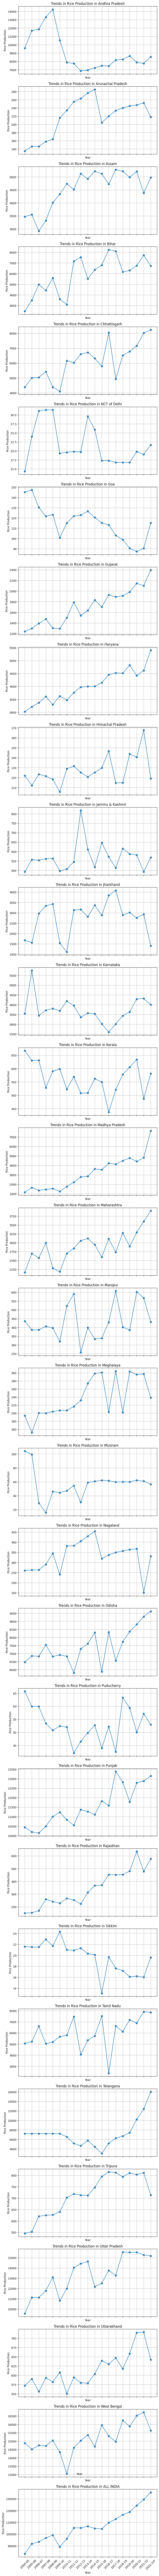

In [ ]:
states = df_T.columns


fig, axs = plt.subplots(nrows=len(states), ncols=1, figsize=(8, 4*len(states)), sharex=True)

for i, state in enumerate(states):
    axs[i].plot(df_T.index, df_T[state], marker='o', linestyle='-')
    axs[i].set_title(f'Trends in Rice Production in {state}')
    axs[i].set_ylabel('Rice Production')
    axs[i].set_xlabel('Year')
    axs[i].grid(True)
    axs[i].tick_params(axis='x', rotation=45)

fig.text(0.5, 0.04, 'Year', ha='center', va='center')


plt.tight_layout()
plt.show()

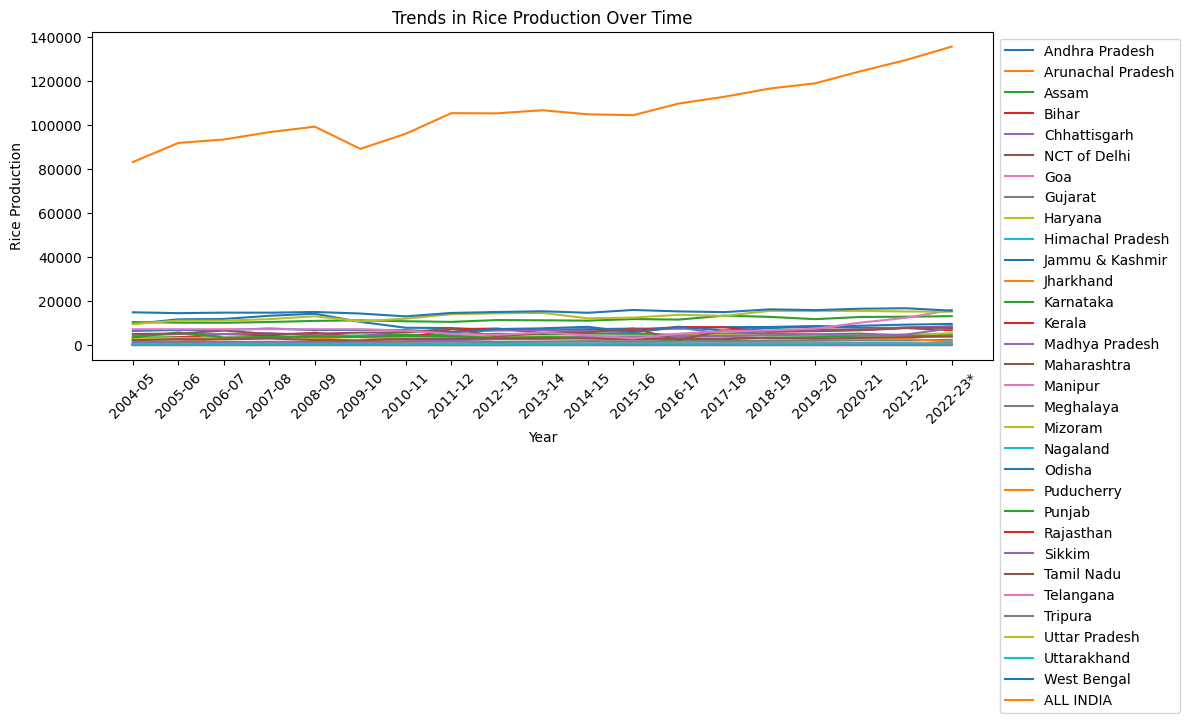

In [ ]:

fig, ax = plt.subplots(figsize=(12, 6))


for state in df_T.columns:
    ax.plot(df_T.index, df_T[state], label=state)

ax.set_xlabel('Year')
ax.set_ylabel('Rice Production')
ax.set_title('Trends in Rice Production Over Time')


ax.legend(loc='upper left', bbox_to_anchor=(1, 1))


plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

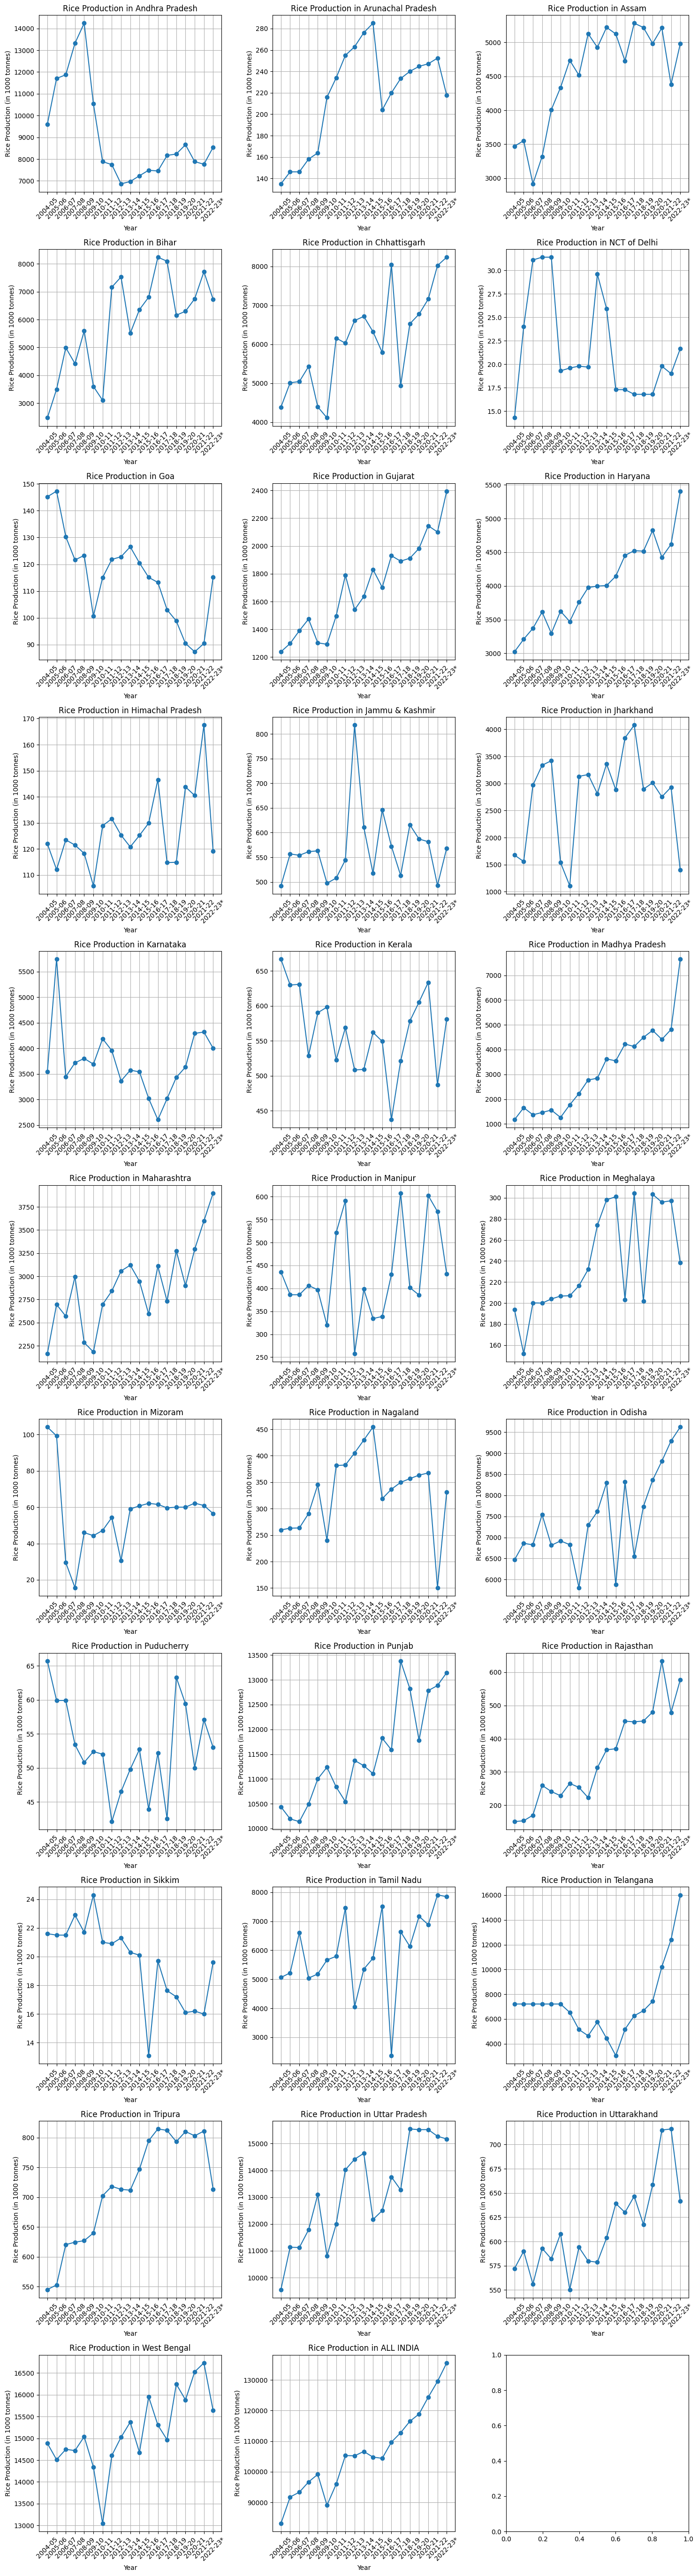

In [ ]:
num_states = df.shape[0]
num_cols = 3
num_rows = (num_states + num_cols - 1) // num_cols


fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))


if num_rows == 1:
    axes = [axes]

for i, state in enumerate(df.index):
    row_idx = i // num_cols
    col_idx = i % num_cols
    axes[row_idx][col_idx].plot(df.columns, df.loc[state].values, marker='o', linestyle='-')
    axes[row_idx][col_idx].set_title(f'Rice Production in {state}')
    axes[row_idx][col_idx].set_xlabel('Year')
    axes[row_idx][col_idx].set_ylabel('Rice Production (in 1000 tonnes)')
    axes[row_idx][col_idx].tick_params(axis='x', rotation=45)
    axes[row_idx][col_idx].grid(True)


plt.tight_layout()
plt.show()


**Observation: Rice production in Andhra pradesh, Delhi NCT, Goa, J and K, Jharkhand, Nagaland, Sikkim has fallen over the years and needs to increase**

# Outlier Detection

In [ ]:
y = df_T['ALL INDIA']
df_T_A = df_T.drop(columns=['ALL INDIA'])

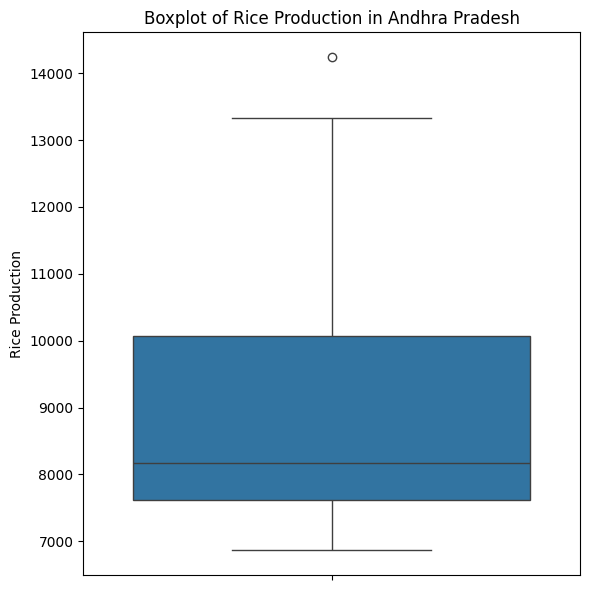

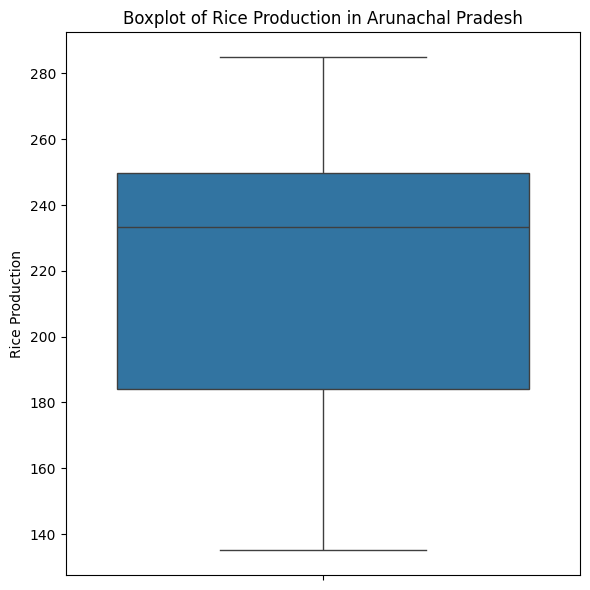

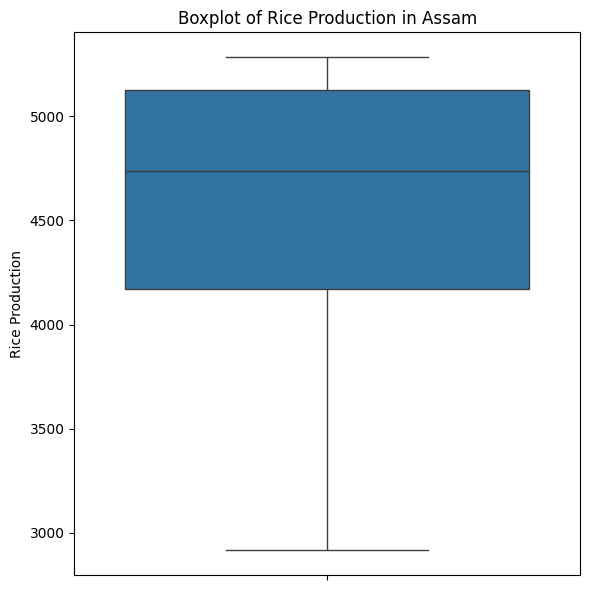

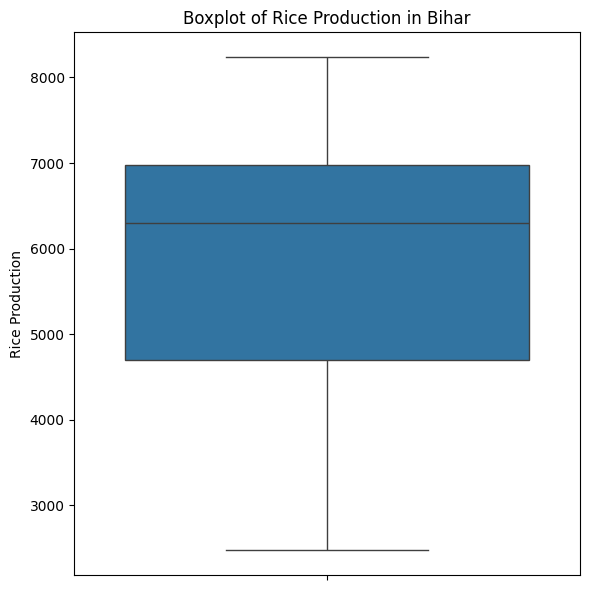

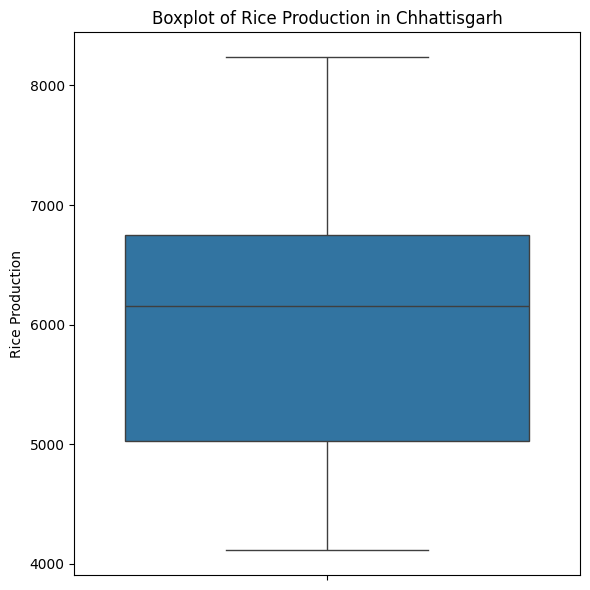

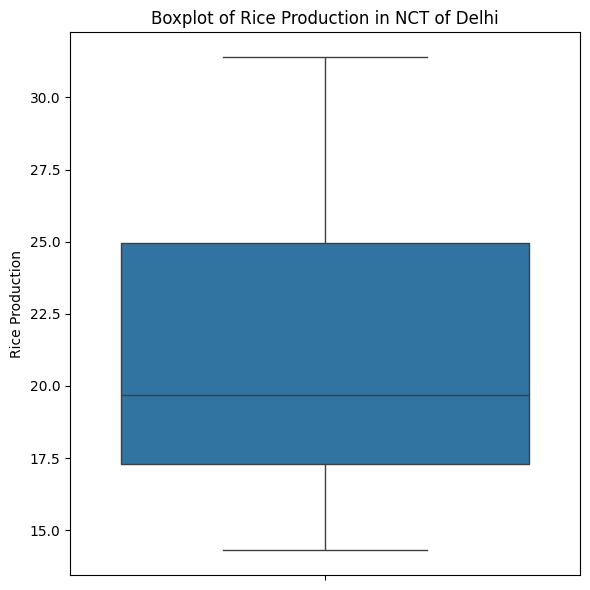

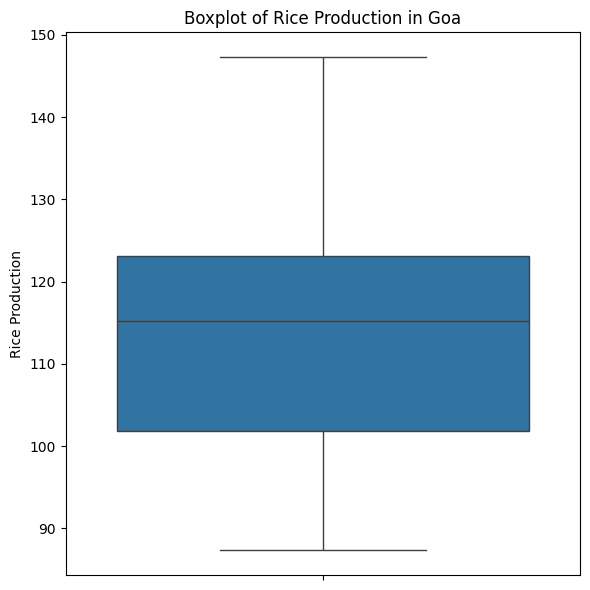

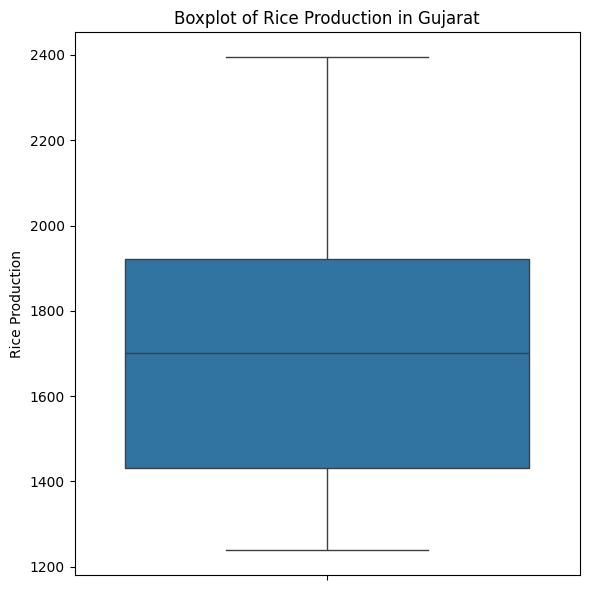

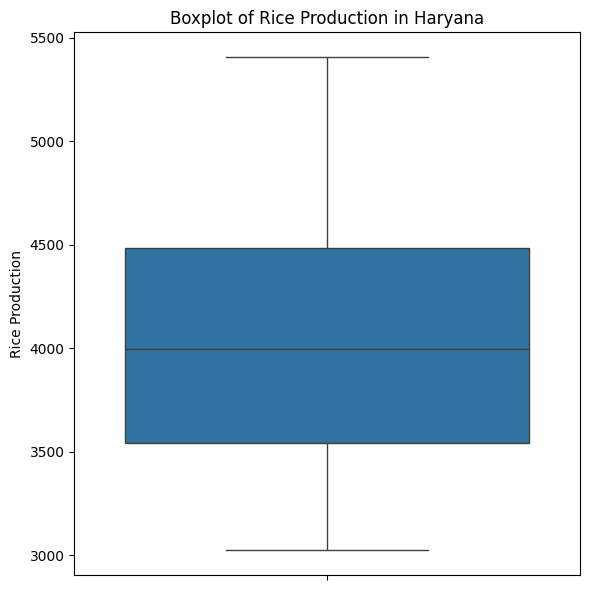

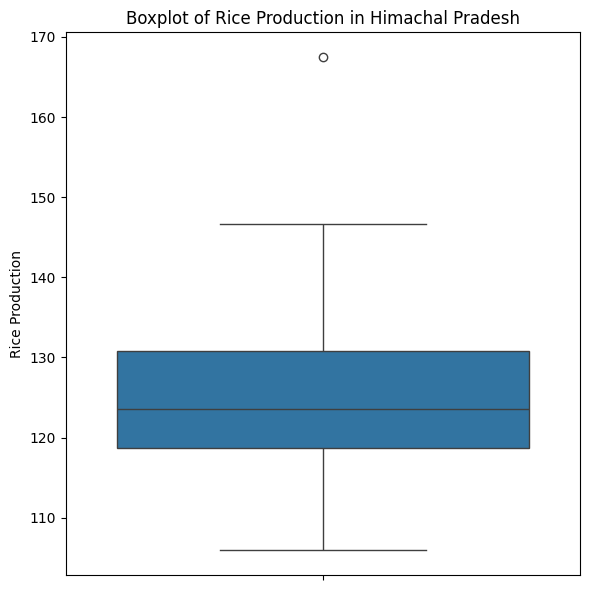

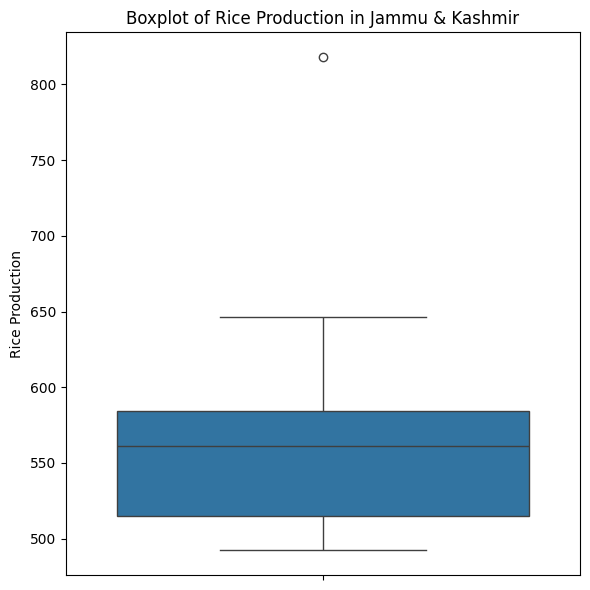

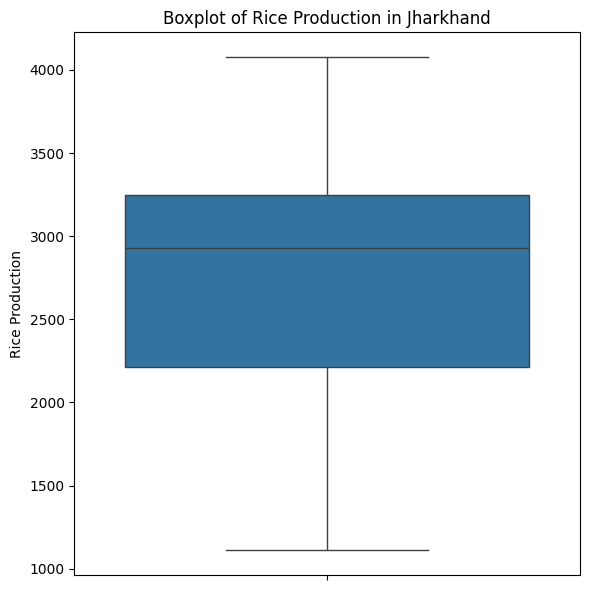

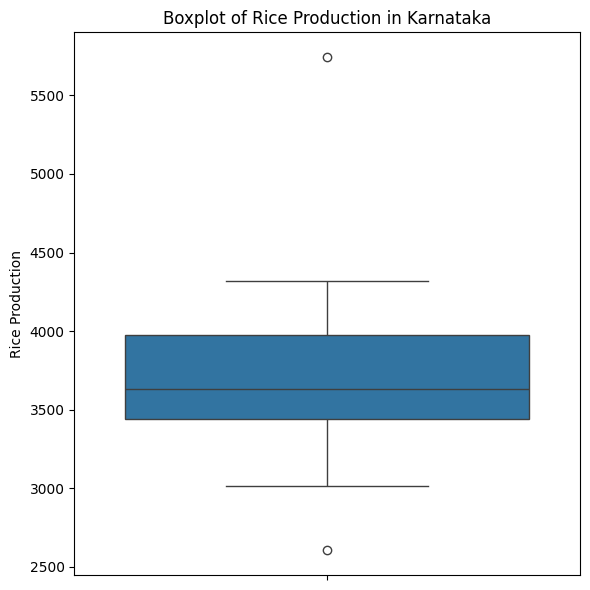

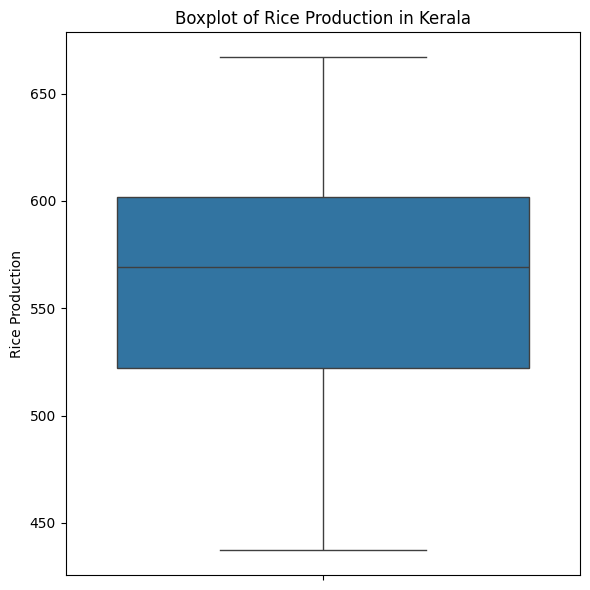

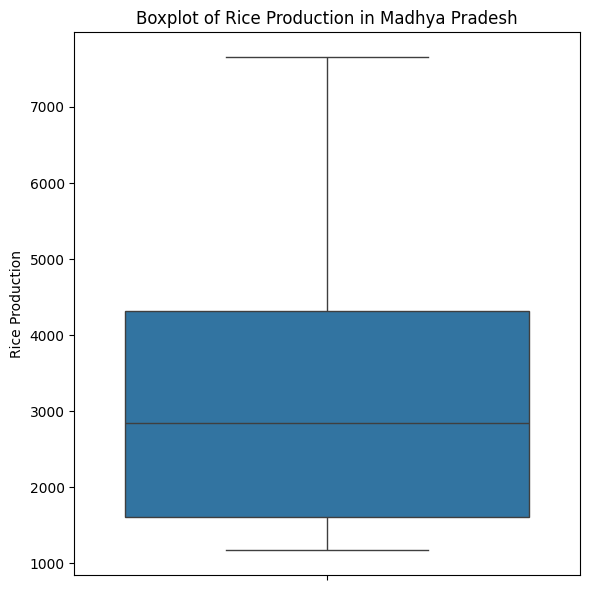

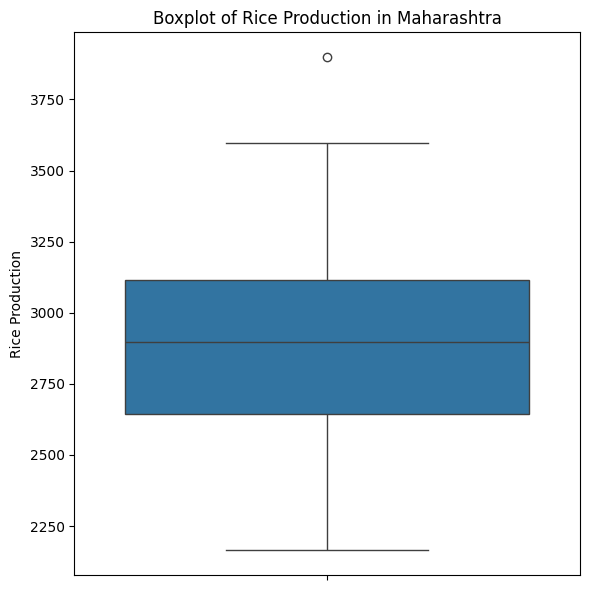

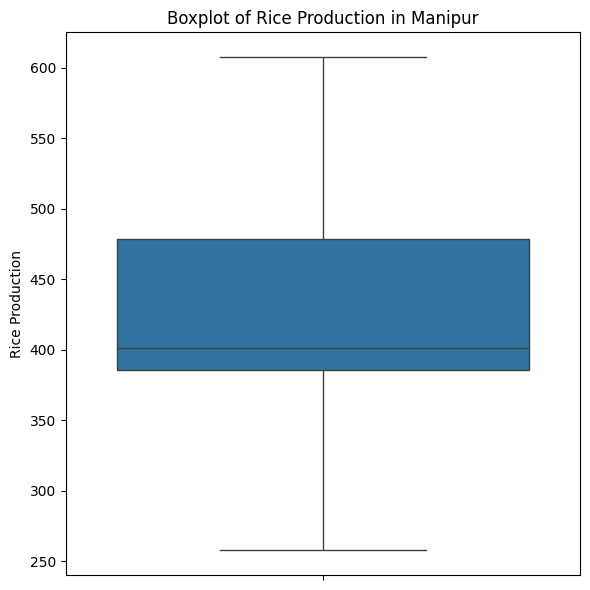

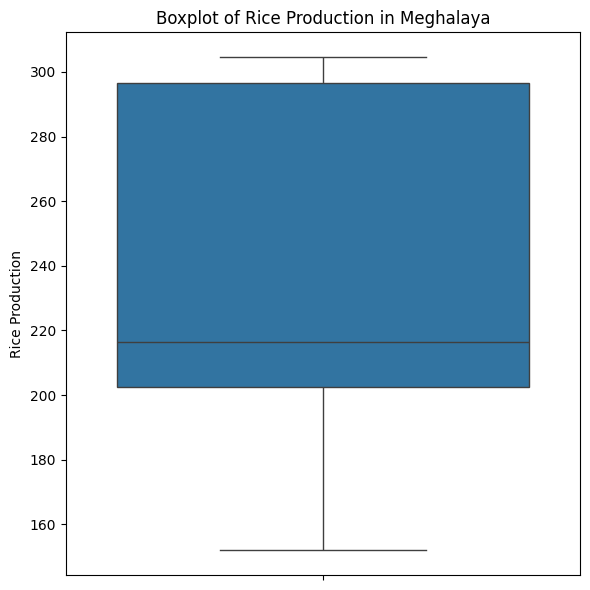

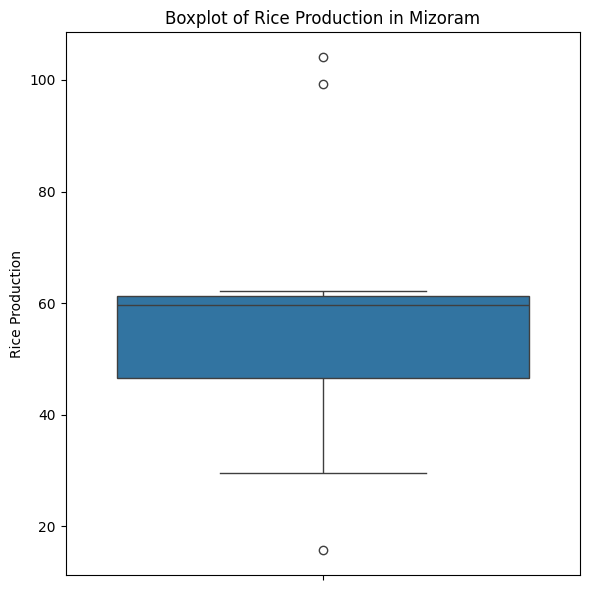

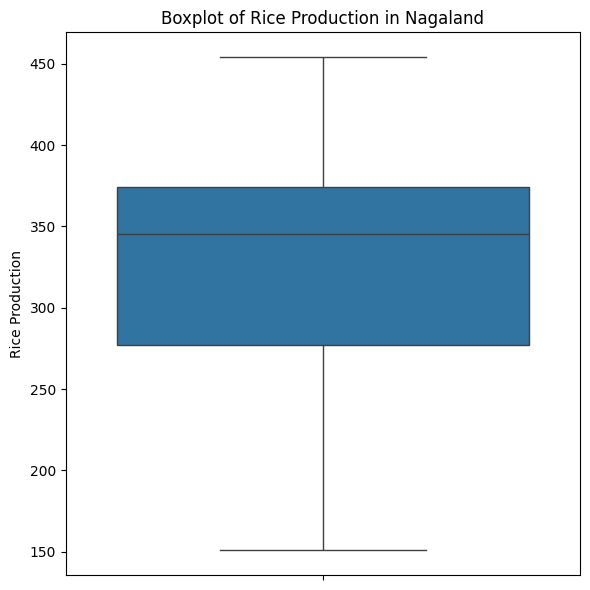

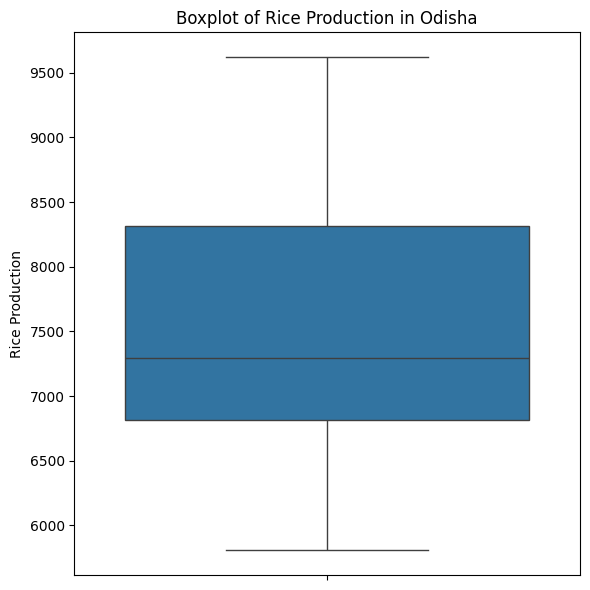

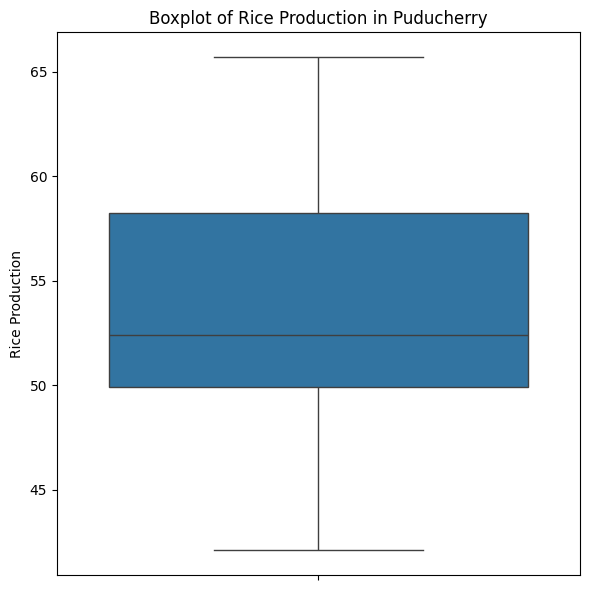

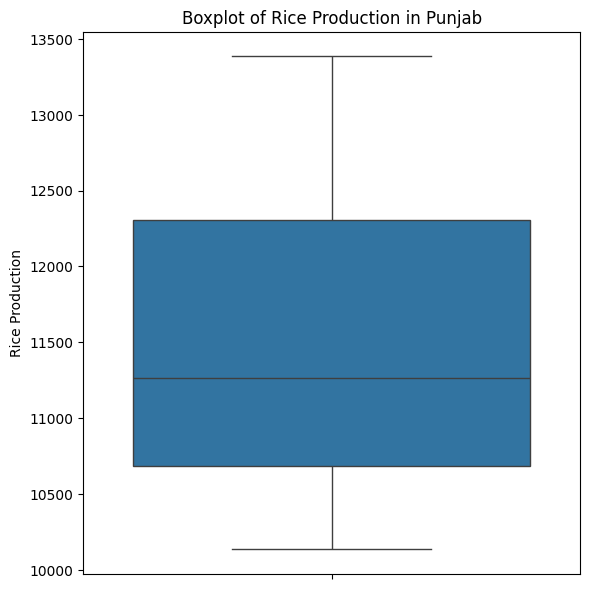

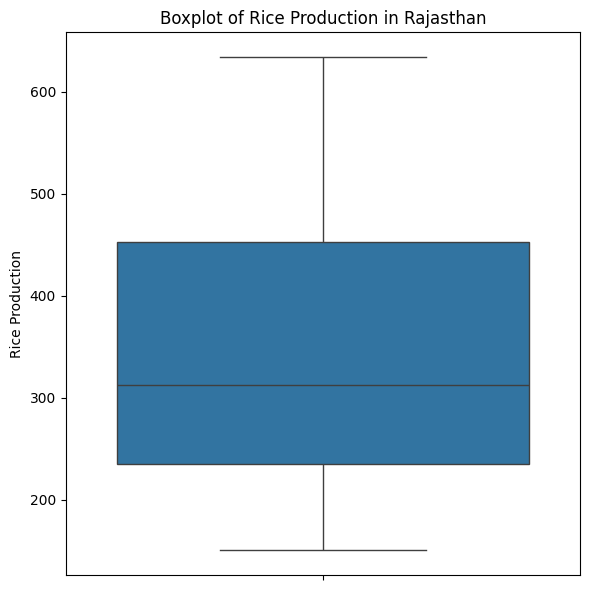

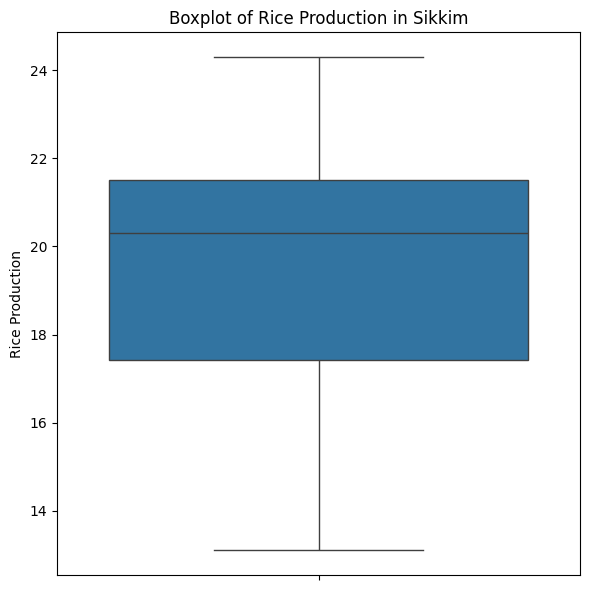

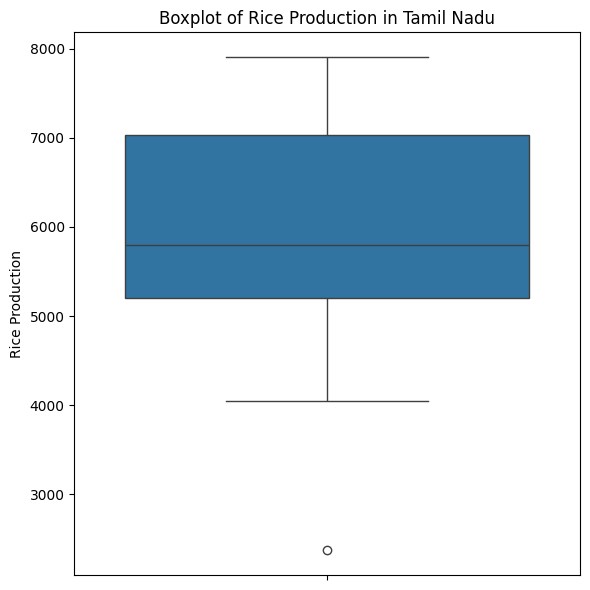

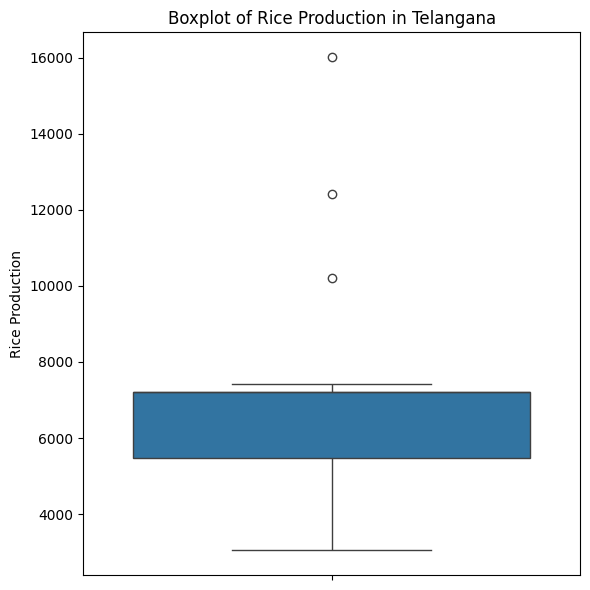

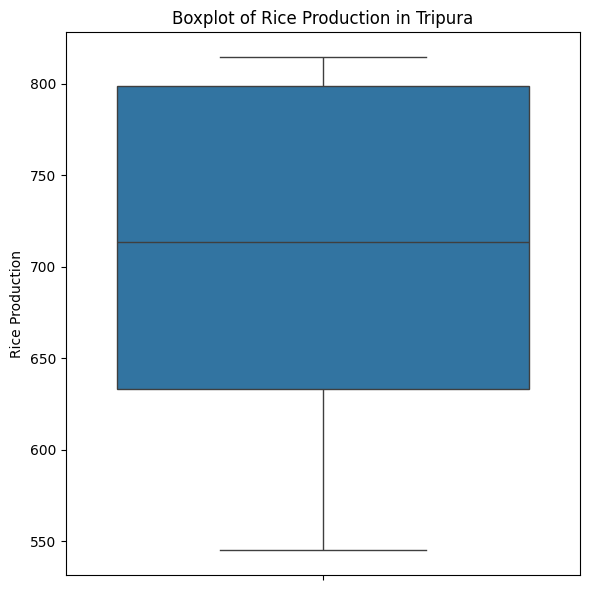

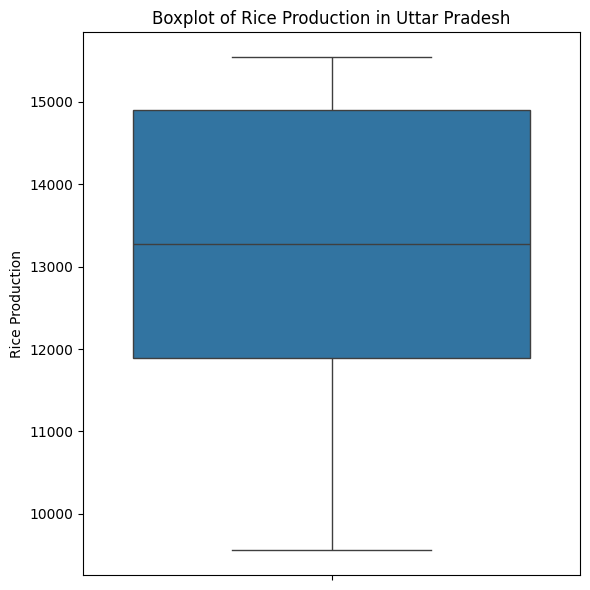

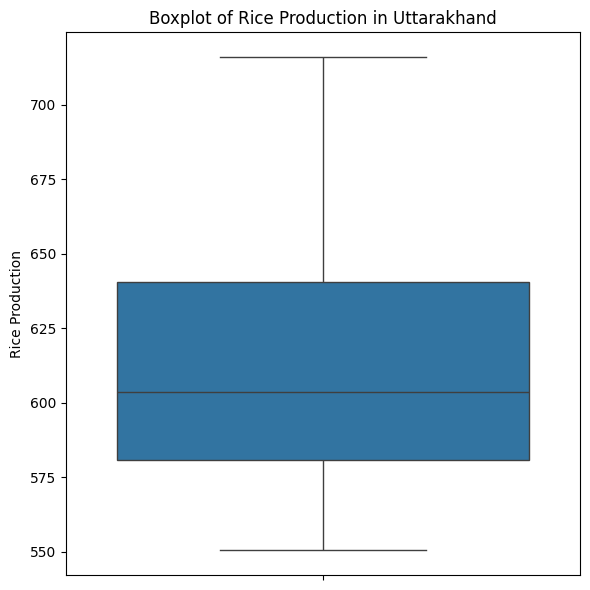

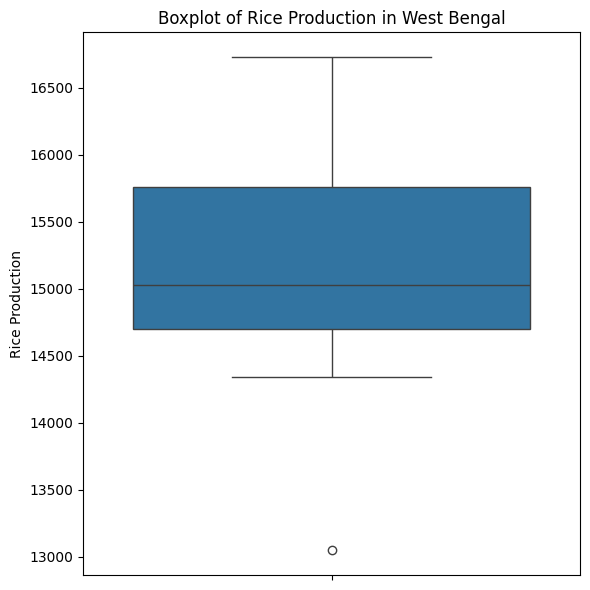

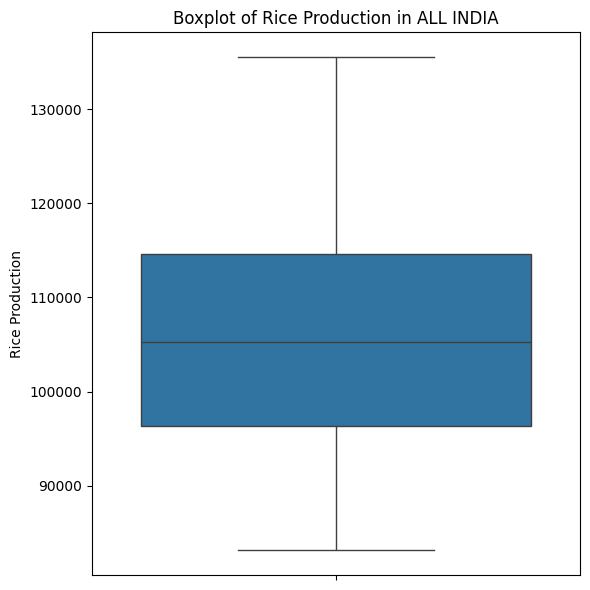

In [ ]:

states = df_T.columns


for state in states:

    fig, ax = plt.subplots(figsize=(6, 6))


    sns.boxplot(y=df_T[state], ax=ax)


    ax.set_ylabel('Rice Production')
    ax.set_title(f'Boxplot of Rice Production in {state}')


    plt.tight_layout()
    plt.show()

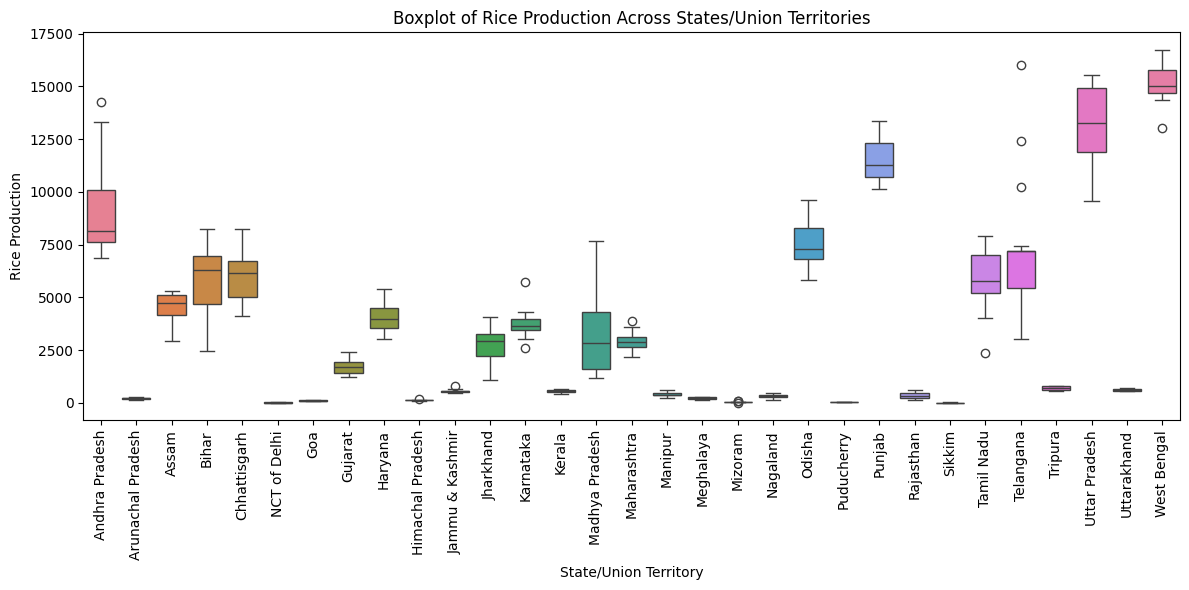

In [ ]:

fig, ax = plt.subplots(figsize=(12, 6))

#
sns.boxplot(data=df_T_A, ax=ax)


ax.set_xlabel('State/Union Territory')
ax.set_ylabel('Rice Production')
ax.set_title('Boxplot of Rice Production Across States/Union Territories')


plt.xticks(rotation=90)


plt.tight_layout()
plt.show()

# Regional Comparisons


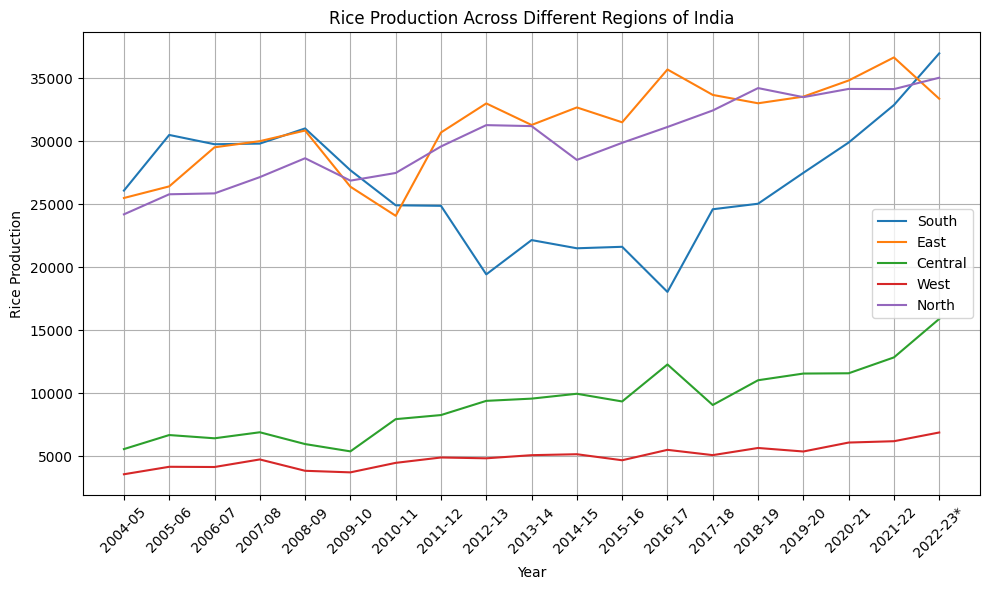

In [ ]:

north_states = ['Delhi', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Punjab', 'Uttarakhand', 'Uttar Pradesh']
south_states = ['Andhra Pradesh', 'Karnataka', 'Kerala', 'Tamil Nadu', 'Telangana']
east_states = ['Bihar', 'Jharkhand', 'Odisha', 'West Bengal']
west_states = ['Gujarat', 'Maharashtra', 'Rajasthan']
central_states = ['Chhattisgarh', 'Madhya Pradesh']


state_to_region = {}
for state in df_T.columns:
    if state in north_states:
        state_to_region[state] = 'North'
    elif state in south_states:
        state_to_region[state] = 'South'
    elif state in east_states:
        state_to_region[state] = 'East'
    elif state in west_states:
        state_to_region[state] = 'West'
    elif state in central_states:
        state_to_region[state] = 'Central'


region_production = {}
for state, region in state_to_region.items():
    if region not in region_production:
        region_production[region] = df_T[state]
    else:
        region_production[region] += df_T[state]


plt.figure(figsize=(10, 6))
for region, production in region_production.items():
    plt.plot(df_T.index, production, label=region)


plt.xlabel('Year')
plt.ylabel('Rice Production')
plt.title('Rice Production Across Different Regions of India')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

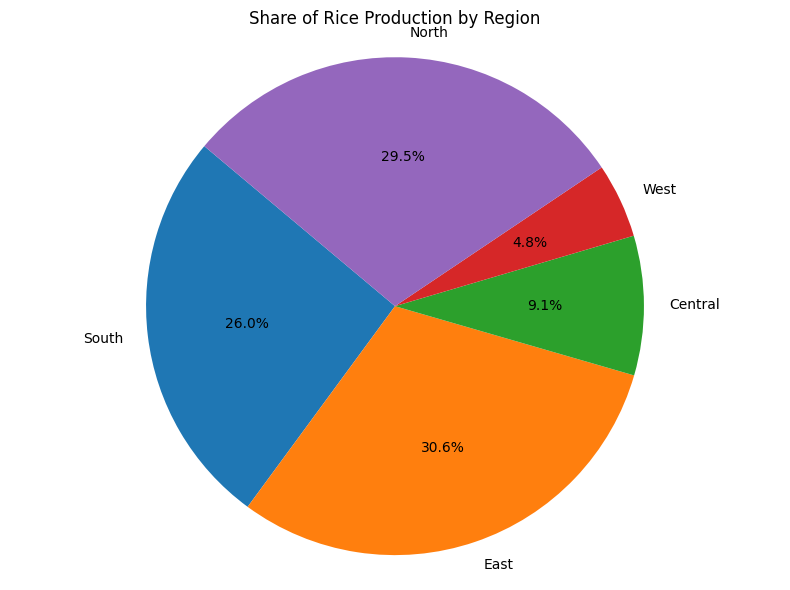

In [ ]:

total_production = {region: production.sum() for region, production in region_production.items()}


plt.figure(figsize=(8, 6))
plt.pie(total_production.values(), labels=total_production.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Share of Rice Production by Region')
plt.axis('equal')

plt.tight_layout()
plt.show()

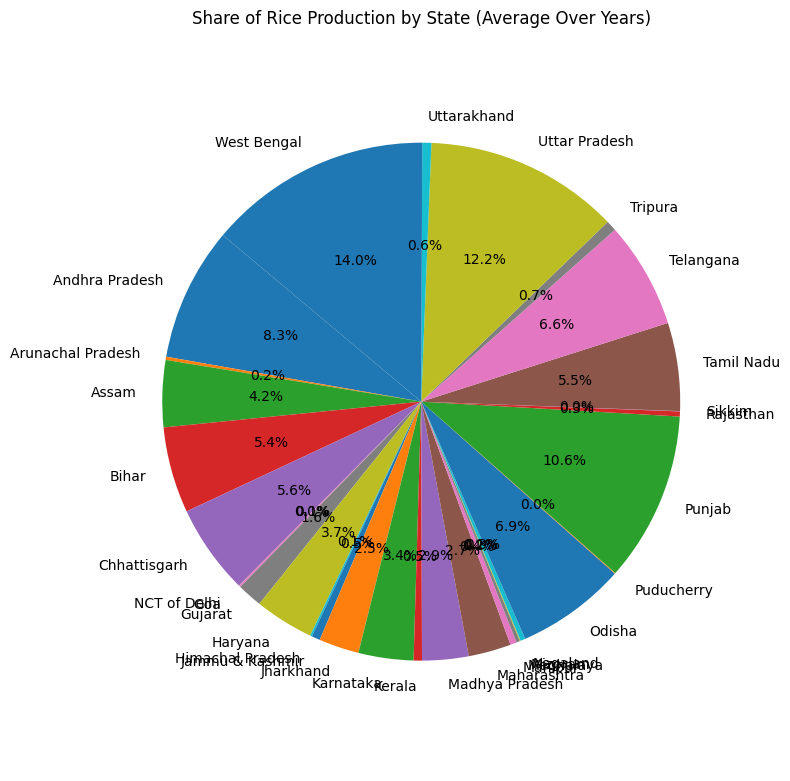

In [ ]:

average_production = df_T_A.mean()


plt.figure(figsize=(8, 8))
plt.pie(average_production, labels=average_production.index, autopct='%1.1f%%', startangle=140)
plt.title('Share of Rice Production by State (Average Over Years)')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:

average_production = df_T_A.mean()


highest_state = average_production.idxmax()
lowest_state = average_production.idxmin()


highest_production = average_production[highest_state]
lowest_production = average_production[lowest_state]


print(f"Highest Producing State: {highest_state}, Production: {highest_production:.2f} (Average Over Years)")
print(f"Lowest Producing State: {lowest_state}, Production: {lowest_production:.2f} (Average Over Years)")


Highest Producing State: West Bengal, Production: 15168.38 (Average Over Years)
Lowest Producing State: Sikkim, Production: 19.61 (Average Over Years)


# Seasonality


In [ ]:
rainfall_data = {
    'Year': ['2004-05', '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20', '2021-22', '2022-23'],
    'Annual Rainfall': [790, 875.2, 926.8, 970.9, 902.8, 714.2, 910.7, 915.4, 841.7, 945.8, 784.2, 765.4, 863.7, 843.7, 802.4, 969.4, 863.8, 868.5]
}
rainfall_df = pd.DataFrame(rainfall_data)

rainfall_df.set_index('Year', inplace=True)

df_T_with_rainfall = pd.merge(df_T, rainfall_df, left_index=True, right_index=True, how='left')


print(df_T_with_rainfall)


          Andhra Pradesh  Arunachal Pradesh   Assam     Bihar  Chhattisgarh  \
2004-05     26088.746154         135.000000  3470.7  25500.00        5552.3   
2005-06     30509.346154         146.200000  3552.5  26423.30        6667.9   
2006-07     29771.046154         146.200000  2916.0  29527.70        6409.8   
2007-08     29821.146154         158.100000  3319.0  30014.70        6888.5   
2008-09     31027.446154         163.900000  4008.5  30860.50        5951.5   
2009-10     27703.946154         215.800000  4335.9  26395.90        5371.0   
2010-11     24921.100000         234.000000  4736.6  24085.70        7931.1   
2011-12     24877.700000         255.000000  4516.3  30706.00        8255.7   
2012-13     19432.200000         263.000000  5128.5  33013.40        9383.8   
2013-14     22156.300000         276.200000  4927.1  31300.50        9561.2   
2014-15     21505.600000         285.000000  5222.7  32694.00        9947.4   
2015-16     21623.100000         204.000000  5125.1 

In [ ]:
df_T_with_rainfall['Annual Rainfall'] = df_T_with_rainfall['Annual Rainfall'].fillna(df_T_with_rainfall['Annual Rainfall'].mean())

In [ ]:
df_T_with_rainfall

Andhra Pradesh  Arunachal Pradesh   Assam     Bihar  Chhattisgarh  \
2004-05     26088.746154         135.000000  3470.7  25500.00        5552.3   
2005-06     30509.346154         146.200000  3552.5  26423.30        6667.9   
2006-07     29771.046154         146.200000  2916.0  29527.70        6409.8   
2007-08     29821.146154         158.100000  3319.0  30014.70        6888.5   
2008-09     31027.446154         163.900000  4008.5  30860.50        5951.5   
2009-10     27703.946154         215.800000  4335.9  26395.90        5371.0   
2010-11     24921.100000         234.000000  4736.6  24085.70        7931.1   
2011-12     24877.700000         255.000000  4516.3  30706.00        8255.7   
2012-13     19432.200000         263.000000  5128.5  33013.40        9383.8   
2013-14     22156.300000         276.200000  4927.1  31300.50        9561.2   
2014-15     21505.600000         285.000000  5222.7  32694.00        9947.4   
2015-16     21623.100000         204.000000  5125.1  31513.70        9336.1   
2016-17     18037.100000         220.000000  4727.4  35709.50       12275.2   
2017-18     24605.700000         233.300000  5283.7  33689.44        9054.7   
2018-19     25044.900000         240.000000  5220.6  33025.30       11021.6   
2019-20     27497.900000         244.700000  4984.6  33552.60       11553.0   
2020-21     29906.800000         247.100000  5214.8  34834.60       11575.0   
2021-22     32885.200000         252.400000  4382.1  36667.00       12836.6   
2022-23*    36989.500000         217.772222  4979.8  33383.10       15895.5   

          NCT of Delhi         Goa  Gujarat       Haryana  Himachal Pradesh  \
2004-05      14.300000  145.200000  3552.60  24201.800000            122.00   
2005-06      24.000000  147.300000  4146.00  25795.600000            112.10   
2006-07      31.100000  130.300000  4128.80  25866.500000            123.50   
2007-08      31.400000  121.600000  4729.60  27157.800000            121.50   
2008-09      31.400000  123.300000  3828.10  28658.400000            118.30   
2009-10      19.300000  100.600000  3703.30  26879.400000            105.90   
2010-11      19.600000  115.000000  4458.10  27488.000000            128.90   
2011-12      19.800000  121.800000  4884.40  29593.300000            131.60   
2012-13      19.700000  122.800000  4820.50  31289.200000            125.30   
2013-14      29.600000  126.500000  5068.60  31211.300000            120.80   
2014-15      25.900000  120.500000  5143.60  28527.000000            125.20   
2015-16      17.300000  115.100000  4664.80  29884.400000            129.90   
2016-17      17.300000  113.200000  5492.20  31142.000000            146.60   
2017-18      16.800000  103.000000  5072.57  32453.800000            114.79   
2018-19      16.800000   98.800000  5641.00  34231.300000            114.90   
2019-20      16.800000   90.400000  5361.20  33510.600000            143.80   
2020-21      19.800000   87.300000  6071.40  34165.500000            140.50   
2021-22      19.000000   90.400000  6177.80  34151.500000            167.50   
2022-23*     21.661111  115.172222  6871.70  35054.263333            119.20   

          ...  Rajasthan     Sikkim  Tamil Nadu     Telangana     Tripura  \
2004-05   ...     150.40  21.600000      5062.2   7211.446154  545.100000   
2005-06   ...     153.00  21.500000      5220.0   7211.446154  552.900000   
2006-07   ...     169.80  21.500000      6610.6   7211.446154  620.500000   
2007-08   ...     259.60  22.900000      5040.2   7211.446154  624.600000   
2008-09   ...     241.10  21.700000      5182.7   7211.446154  627.100000   
2009-10   ...     228.30  24.300000      5665.2   7211.446154  640.000000   
2010-11   ...     265.50  21.000000      5792.4   6535.600000  702.500000   
2011-12   ...     253.40  20.900000      7458.7   5148.800000  718.300000   
2012-13   ...     222.50  21.300000      4049.9   4647.600000  713.200000   
2013-14   ...     312.60  20.300000      5349.8   5755.000000  711.800000   
2

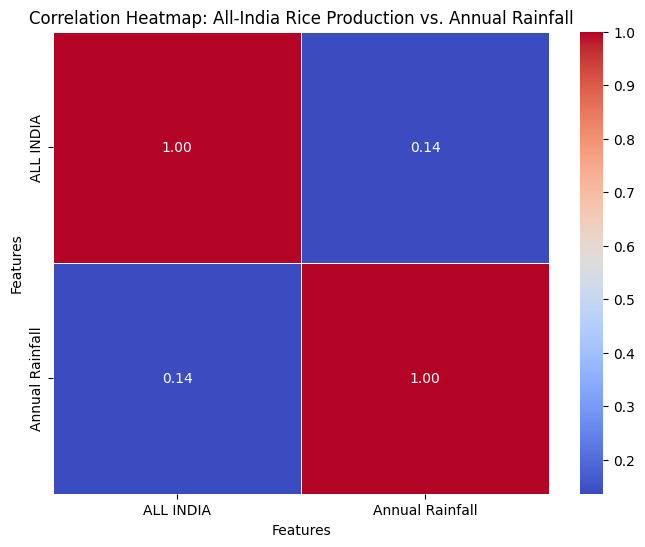

In [ ]:

correlation_matrix = df_T_with_rainfall[['ALL INDIA', 'Annual Rainfall']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap: All-India Rice Production vs. Annual Rainfall')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()


In [ ]:
# Imports
import numpy as np
import pandas as pd

import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:

df_table1 = pd.read_excel("rice_production_modified.xlsx", sheet_name="Table 1", header=1)
df_table1.head()

State/Union Territory 2004-05 2005-06 2006-07 2007-08 2008-09 2009-10  \
0        Andhra Pradesh    9601   11704   11872   13324   14241   10538   
1     Arunachal Pradesh     135   146.2   146.2   158.1   163.9   215.8   
2                 Assam  3470.7  3552.5    2916    3319  4008.5  4335.9   
3                 Bihar  2472.2  3495.5  4989.3  4418.1  5590.3  3599.3   
4          Chhattisgarh  4383.3  5011.6  5041.4  5426.6  4391.8  4110.4   

   2010-11  2011-12  2012-13  
0   7882.4   7746.2   6862.4  
1    234.0    255.0    263.0  
2   4736.6   4516.3   5128.5  
3   3102.1   7162.6   7529.3  
4   6159.0   6028.4   6608.8

In [ ]:
df_table2 = pd.read_excel("rice_production_modified.xlsx", sheet_name="Table 2", header=1).drop(labels = 'State/Union Territory', axis=1)
df_table2.head()

2013-14  2014-15  2015-16  2016-17  2017-18  2018-19  2019-20  2020-21  \
0   6969.7   7233.9   7488.7   7452.4   8166.2   8234.7   8658.9   7882.9   
1    276.2    285.0    204.0    220.0    233.3    240.0    244.7    247.1   
2   4927.1   5222.7   5125.1   4727.4   5283.7   5220.6   4984.6   5214.8   
3   5505.8   6356.7   6802.2   8239.3   8093.1   6155.5   6298.0   6747.0   
4   6716.4   6322.1   5789.4   8048.4   4930.8   6526.9   6774.8   7161.2   

   2021-22 2022-23*  
0   7763.6   8542.3  
1    252.4        -  
2   4382.1   4979.8  
3   7717.0   6725.2  
4   8021.7   8238.3

In [ ]:
# Load data

rainfall_data = pd.read_csv('/content/Monthly_Rainfall_From_1901_to_2017.csv')

yield_data = pd.concat([df_table1, df_table2], axis=1)

In [ ]:
# # Load data

# rainfall_data = pd.read_csv('Monthly_Rainfall_From_1901_to_2017.csv')

# yield_data = pd.read_excel('State_wise_rice_production_in_India.xlsx',header=1)

In [ ]:
yield_data

State/Union Territory  2004-05  2005-06  2006-07  2007-08  2008-09  \
0         Andhra Pradesh     9601    11704    11872    13324    14241   
1      Arunachal Pradesh      135    146.2    146.2    158.1    163.9   
2                  Assam   3470.7   3552.5     2916     3319   4008.5   
3                  Bihar   2472.2   3495.5   4989.3   4418.1   5590.3   
4           Chhattisgarh   4383.3   5011.6   5041.4   5426.6   4391.8   
5           NCT of Delhi     14.3       24     31.1     31.4     31.4   
6                    Goa    145.2    147.3    130.3    121.6    123.3   
7                Gujarat   1238.2     1298     1390     1474     1303   
8                Haryana     3023     3210     3371     3613     3298   
9       Himachal Pradesh      122    112.1    123.5    121.5    118.3   
10       Jammu & Kashmir    492.2    556.8      554    561.3    563.1   
11             Jharkhand     1677     1558   2967.8   3336.4   3420.2   
12             Karnataka     3547     5744     3446     3717     3802   
13                Kerala    667.1    629.9      631    528.5    590.3   
14        Madhya Pradesh     1169   1656.3   1368.4   1461.9   1559.7   
15           Maharashtra     2164     2695     2569     2996     2284   
16               Manipur    435.9    386.1    386.1    406.2      397   
17             Meghalaya    193.7    151.9    200.2      200    203.9   
18               Mizoram    104.1     99.2     29.5     15.7       46   
19              Nagaland    259.8    263.1    263.5    290.6    345.1   
20                Odisha     6466     6859   6824.7   7540.7   6812.7   
21            Puducherry     65.7     59.9     59.9     53.4     50.8   
22                Punjab    10437    10193    10138    10489    11000   
23             Rajasthan    150.4      153    169.8    259.6    241.1   
24                Sikkim     21.6     21.5     21.5     22.9     21.7   
25            Tamil Nadu   5062.2     5220   6610.6   5040.2   5182.7   
26             Telangana        .        .        .        .        .   
27               Tripura    545.1    552.9    620.5    624.6    627.1   
28         Uttar Pradesh   9555.6  11133.7    11124    11780    13097   
29           Uttarakhand      572      590      556      593      582   
30           West Bengal  14884.8  14510.8  14745.9  14719.5  15037.3   
31             ALL INDIA  83131.7  91793.4  93355.3  96692.9  99182.5   

    2009-10  2010-11   2011-12   2012-13   2013-14   2014-15   2015-16  \
0     10538   7882.4    7746.2    6862.4    6969.7    7233.9    7488.7   
1     215.8    234.0     255.0     263.0     276.2     285.0     204.0   
2    4335.9   4736.6    4516.3    5128.5    4927.1    5222.7    5125.1   
3    3599.3   3102.1    7162.6    7529.3    5505.8    6356.7    6802.2   
4    4110.4   6159.0    6028.4    6608.8    6716.4    6322.1    5789.4   
5      19.3     19.6      19.8      19.7      29.6      25.9      17.3   
6     100.6    115.0     121.8     122.8     126.5     120.5     115.1   
7      1292   1496.6    1790.0    1541.0    1636.0    1830.9    1702.0   
8      3625   3472.0    3759.0    3976.0    3998.0    4006.0    4145.0   
9     105.9    128.9     131.6     125.3     120.8     125.2     129.9   
10    497.4    507.7     544.7     818.1     610.9     517.2     646.4   
11   1538.4   1110.0    3130.6    3164.9    2810.6    3361.9    2882.2   
12     3691   4188.0    3955.0    3364.0    3572.6    3541.0    3021.0   
13    598.3    522.7     569.0     508.3     509.2     562.1     549.3   
14   1260.6   1772.1    2227.3    2775.0    2844.8    3625.3    3546.7   
15     2183   2696.0    2841.0    3057.0    3120.0    2946.0    2593.0   
16    319.9    521.7     591.0     257.6     398.5     334.1     338.8   
17    206.7    207.0     216.5     232.0     273.9     298.2     301.1   
18     44.3     47.2      54.3      30.5      59.0      60.7      62.1   
19    240.3    381.4     382.4     405.2     429.6     454.2     318.8   
20   6917.5   6827.7    5807.0    7295.

In [ ]:
yield_data.columns

Index(['State/Union Territory', '2004-05', '2005-06', '2006-07', '2007-08',
       '2008-09', '2009-10', '2010-11', '2011-12', '2012-13', '2013-14',
       '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20',
       '2020-21', '2021-22', '2022-23*'],
      dtype='object')

In [ ]:
# melted_df['YEAR'] = melted_df['YEAR'].str.split('-').str[0].astype(int)

In [ ]:
# # convert all cols except 'State/Union Territory' to float type, errors=coerce and replace those NaN values which cannot be converted with the average values of respective columns

# import pandas as pd
# cols_to_convert = yield_data.columns.difference(['State/Union Territory'])
# yield_data[cols_to_convert] = yield_data[cols_to_convert].apply(pd.to_numeric, errors='coerce')
# for state in cols_to_convert:
#   if yield_data.loc[state].isnull().sum() != 0:
#     yield_data.loc[state] = yield_data.loc[state].fillna(yield_data.loc[state].mean())


In [ ]:
yield_data.dtypes

State/Union Territory     object
2004-05                   object
2005-06                   object
2006-07                   object
2007-08                   object
2008-09                   object
2009-10                   object
2010-11                  float64
2011-12                  float64
2012-13                  float64
2013-14                  float64
2014-15                  float64
2015-16                  float64
2016-17                  float64
2017-18                  float64
2018-19                  float64
2019-20                  float64
2020-21                  float64
2021-22                  float64
2022-23*                  object
dtype: object

In [ ]:
yield_data.isnull().sum().sum()

0

In [ ]:
rainfall_data

Unnamed: 0                 States/UTs  YEAR   JAN    FEB   MAR    APR  \
0              0  Andaman & Nicobar Islands  1901  49.2   87.1  29.2    2.3   
1              1  Andaman & Nicobar Islands  1902   0.0  159.8  12.2    0.0   
2              2  Andaman & Nicobar Islands  1903  12.7  144.0   0.0    1.0   
3              3  Andaman & Nicobar Islands  1904   9.4   14.7   0.0  202.4   
4              4  Andaman & Nicobar Islands  1905   1.3    0.0   3.3   26.9   
...          ...                        ...   ...   ...    ...   ...    ...   
4182        4182                Lakshadweep  2012  19.2    0.1   1.6   76.8   
4183        4183                Lakshadweep  2013  26.2   34.4  37.5    5.3   
4184        4184                Lakshadweep  2014  53.2   16.1   4.4   14.9   
4185        4185                Lakshadweep  2015   2.2    0.5   3.7   87.1   
4186        4186                Lakshadweep  2016  59.6   12.1   3.2    2.6   

        MAY    JUN    JUL    AUG    SEP    OCT    NOV    DEC  ANNUAL  
0     528.8  517.5  365.1  481.1  332.6  388.5  558.2   33.6  3373.2  
1     446.1  537.1  228.9  753.7  666.2  197.2  359.0  160.5  3520.7  
2     235.1  479.9  728.4  326.7  339.0  181.2  284.4  225.0  2957.4  
3     304.5  495.1  502.0  160.1  820.4  222.2  308.7   40.1  3079.6  
4     279.5  628.7  368.7  330.5  297.0  260.7   25.4  344.7  2566.7  
...     ...    ...    ...    ...    ...    ...    ...    ...     ...  
4182   21.2  327.0  231.5  381.2  179.8  145.9   12.4    8.8  1405.5  
4183   88.3  426.2  296.4  154.4  180.0   72.8   78.1   26.7  1426.3  
4184   57.4  244.1  116.1  466.1  132.2  169.2   59.0   62.3  1395.0  
4185  133.1  296.6  257.5  146.4  160.4  165.4  231.0  159.0  1642.9  
4186   77.4  321.1  262.6   86.2   75.6   58.6   32.0   74.7  1065.7  

[4187 rows x 16 columns]

In [ ]:
rainfall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4187 entries, 0 to 4186
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  4187 non-null   int64  
 1   States/UTs  4187 non-null   object 
 2   YEAR        4187 non-null   int64  
 3   JAN         4183 non-null   float64
 4   FEB         4184 non-null   float64
 5   MAR         4181 non-null   float64
 6   APR         4183 non-null   float64
 7   MAY         4184 non-null   float64
 8   JUN         4182 non-null   float64
 9   JUL         4180 non-null   float64
 10  AUG         4183 non-null   float64
 11  SEP         4181 non-null   float64
 12  OCT         4180 non-null   float64
 13  NOV         4176 non-null   float64
 14  DEC         4177 non-null   float64
 15  ANNUAL      4161 non-null   float64
dtypes: float64(13), int64(2), object(1)
memory usage: 523.5+ KB


In [ ]:
rainfall_data.drop(['Unnamed: 0'],axis = 1,inplace=True)

In [ ]:
rainfall_data.head()

States/UTs  YEAR   JAN    FEB   MAR    APR    MAY    JUN  \
0  Andaman & Nicobar Islands  1901  49.2   87.1  29.2    2.3  528.8  517.5   
1  Andaman & Nicobar Islands  1902   0.0  159.8  12.2    0.0  446.1  537.1   
2  Andaman & Nicobar Islands  1903  12.7  144.0   0.0    1.0  235.1  479.9   
3  Andaman & Nicobar Islands  1904   9.4   14.7   0.0  202.4  304.5  495.1   
4  Andaman & Nicobar Islands  1905   1.3    0.0   3.3   26.9  279.5  628.7   

     JUL    AUG    SEP    OCT    NOV    DEC  ANNUAL  
0  365.1  481.1  332.6  388.5  558.2   33.6  3373.2  
1  228.9  753.7  666.2  197.2  359.0  160.5  3520.7  
2  728.4  326.7  339.0  181.2  284.4  225.0  2957.4  
3  502.0  160.1  820.4  222.2  308.7   40.1  3079.6  
4  368.7  330.5  297.0  260.7   25.4  344.7  2566.7

In [ ]:
rainfall_data.describe()

YEAR          JAN          FEB          MAR          APR  \
count  4187.000000  4183.000000  4184.000000  4181.000000  4183.000000   
mean   1959.206831    18.937772    21.604374    27.395503    43.081712   
std      33.709294    33.797148    35.734572    46.920068    68.156144   
min    1901.000000     0.000000     0.000000     0.000000     0.000000   
25%    1930.000000     0.600000     0.500000     1.000000     3.000000   
50%    1959.000000     5.900000     6.500000     7.900000    15.500000   
75%    1988.000000    22.000000    26.600000    31.300000    49.700000   
max    2017.000000   583.700000   403.500000   605.600000   595.100000   

               MAY          JUN          JUL          AUG          SEP  \
count  4184.000000  4182.000000  4180.000000  4183.000000  4181.000000   
mean     85.646511   230.047704   347.063780   289.762156   197.311863   
std     122.706290   234.276638   268.867991   188.444169   135.563551   
min       0.000000     0.400000     0.000000     0.000000     0.100000   
25%       8.600000    70.800000   175.825000   155.800000   100.400000   
50%      36.850000   138.750000   285.050000   258.500000   173.600000   
75%      97.725000   304.700000   418.525000   377.650000   266.200000   
max    1168.600000  1609.900000  2362.800000  1664.600000  1222.000000   

               OCT          NOV          DEC       ANNUAL  
count  4180.000000  4176.000000  4177.000000  4161.000000  
mean     95.314713    39.490685    18.934858  1409.370031  
std      99.204613    68.365883    43.003479   902.693445  
min       0.000000     0.000000     0.000000    62.300000  
25%      14.600000     0.600000     0.100000   803.000000  
50%      65.100000     9.400000     3.000000  1120.200000  
75%     148.300000    45.300000    17.500000  1642.900000  
max     948.300000   648.900000   617.500000  6331.100000

In [ ]:
len(rainfall_data['YEAR'].unique())

117

In [ ]:
rainfall_data.head(12)

States/UTs  YEAR    JAN    FEB    MAR    APR    MAY    JUN  \
0   Andaman & Nicobar Islands  1901   49.2   87.1   29.2    2.3  528.8  517.5   
1   Andaman & Nicobar Islands  1902    0.0  159.8   12.2    0.0  446.1  537.1   
2   Andaman & Nicobar Islands  1903   12.7  144.0    0.0    1.0  235.1  479.9   
3   Andaman & Nicobar Islands  1904    9.4   14.7    0.0  202.4  304.5  495.1   
4   Andaman & Nicobar Islands  1905    1.3    0.0    3.3   26.9  279.5  628.7   
5   Andaman & Nicobar Islands  1906   36.6    0.0    0.0    0.0  556.1  733.3   
6   Andaman & Nicobar Islands  1907  110.7    0.0  113.3   21.6  616.3  305.2   
7   Andaman & Nicobar Islands  1908   20.9   85.1    0.0   29.0  562.0  693.6   
8   Andaman & Nicobar Islands  1910   26.6   22.7  206.3   89.3  224.5  472.7   
9   Andaman & Nicobar Islands  1911    0.0    8.4    0.0  122.5  327.3  649.0   
10  Andaman & Nicobar Islands  1912  583.7    0.8    0.0   21.9  140.7  549.8   
11  Andaman & Nicobar Islands  1913   84.8    0.5    1.3    2.5  190.7  530.0   

      JUL    AUG    SEP    OCT    NOV    DEC  ANNUAL  
0   365.1  481.1  332.6  388.5  558.2   33.6  3373.2  
1   228.9  753.7  666.2  197.2  359.0  160.5  3520.7  
2   728.4  326.7  339.0  181.2  284.4  225.0  2957.4  
3   502.0  160.1  820.4  222.2  308.7   40.1  3079.6  
4   368.7  330.5  297.0  260.7   25.4  344.7  2566.7  
5   247.7  320.5  164.3  267.8  128.9   79.2  2534.4  
6   443.9  377.6  200.4  264.4  648.9  245.6  3347.9  
7   481.4  699.9  428.8  170.7  208.1  196.9  3576.4  
8   264.3  337.4  626.6  208.2  267.3  153.5  2899.4  
9   253.0  187.1  464.5  333.8   94.5  247.1  2687.2  
10  468.9  370.3  386.2  318.7  117.2    2.3  2960.5  
11  280.8  205.8  580.1  288.8  133.0   67.5  2365.8

In [ ]:
rainfall_df = rainfall_data.groupby(['YEAR'],as_index = False,axis = 0)

In [ ]:
rainfall_df.head()

States/UTs  YEAR   JAN    FEB   MAR    APR    MAY    JUN  \
0    Andaman & Nicobar Islands  1901  49.2   87.1  29.2    2.3  528.8  517.5   
1    Andaman & Nicobar Islands  1902   0.0  159.8  12.2    0.0  446.1  537.1   
2    Andaman & Nicobar Islands  1903  12.7  144.0   0.0    1.0  235.1  479.9   
3    Andaman & Nicobar Islands  1904   9.4   14.7   0.0  202.4  304.5  495.1   
4    Andaman & Nicobar Islands  1905   1.3    0.0   3.3   26.9  279.5  628.7   
..                         ...   ...   ...    ...   ...    ...    ...    ...   
609       Gangetic West Bengal  1948  13.2   44.9  48.4   52.6  135.9  200.4   
615       Gangetic West Bengal  1954  12.3    5.9   0.3   11.6   88.6  211.1   
616       Gangetic West Bengal  1955   2.9    2.3  11.4   24.3   48.0  174.7   
617       Gangetic West Bengal  1956   4.5   33.9  50.7   25.6  141.6  343.3   
687                     Orissa  1909   5.7   11.9   4.8  148.4   53.1  288.2   

       JUL    AUG    SEP    OCT    NOV    DEC  ANNUAL  
0    365.1  481.1  332.6  388.5  558.2   33.6  3373.2  
1    228.9  753.7  666.2  197.2  359.0  160.5  3520.7  
2    728.4  326.7  339.0  181.2  284.4  225.0  2957.4  
3    502.0  160.1  820.4  222.2  308.7   40.1  3079.6  
4    368.7  330.5  297.0  260.7   25.4  344.7  2566.7  
..     ...    ...    ...    ...    ...    ...     ...  
609  268.4  323.6  214.3  116.7  113.6    0.0  1532.1  
615  201.7  215.1  247.1   56.8    1.5   28.0  1080.0  
616  338.8  251.9  188.1  151.9   73.9    0.1  1268.2  
617  253.9  295.4  391.1  157.6   12.7    3.9  1714.2  
687  452.7  234.3  234.0   42.3    1.8   58.1  1535.5  

[585 rows x 15 columns]

In [ ]:
rainfall_data.drop(['JAN'	,'FEB',	'MAR',	'APR',	'MAY',	'JUN'	,'JUL',	'AUG'	,'SEP'	,'OCT',	'NOV'	,'DEC'	],axis = 1,inplace=True)

In [ ]:
rainfall_data.head()

States/UTs  YEAR  ANNUAL
0  Andaman & Nicobar Islands  1901  3373.2
1  Andaman & Nicobar Islands  1902  3520.7
2  Andaman & Nicobar Islands  1903  2957.4
3  Andaman & Nicobar Islands  1904  3079.6
4  Andaman & Nicobar Islands  1905  2566.7

In [ ]:
rainfall_data = rainfall_data[rainfall_data['YEAR']>=2004]

In [ ]:
rainfall_data


States/UTs  YEAR  ANNUAL
98    Andaman & Nicobar Islands  2004  2460.1
99    Andaman & Nicobar Islands  2005  2954.7
100   Andaman & Nicobar Islands  2006  2404.7
101   Andaman & Nicobar Islands  2007  2748.0
102   Andaman & Nicobar Islands  2008  3374.8
...                         ...   ...     ...
4182                Lakshadweep  2012  1405.5
4183                Lakshadweep  2013  1426.3
4184                Lakshadweep  2014  1395.0
4185                Lakshadweep  2015  1642.9
4186                Lakshadweep  2016  1065.7

[503 rows x 3 columns]

In [ ]:
rainfall_data.columns

Index(['States/UTs', 'YEAR', 'ANNUAL'], dtype='object')

In [ ]:
yield_data.head()

State/Union Territory 2004-05 2005-06 2006-07 2007-08 2008-09 2009-10  \
0        Andhra Pradesh    9601   11704   11872   13324   14241   10538   
1     Arunachal Pradesh     135   146.2   146.2   158.1   163.9   215.8   
2                 Assam  3470.7  3552.5    2916    3319  4008.5  4335.9   
3                 Bihar  2472.2  3495.5  4989.3  4418.1  5590.3  3599.3   
4          Chhattisgarh  4383.3  5011.6  5041.4  5426.6  4391.8  4110.4   

   2010-11  2011-12  2012-13  2013-14  2014-15  2015-16  2016-17  2017-18  \
0   7882.4   7746.2   6862.4   6969.7   7233.9   7488.7   7452.4   8166.2   
1    234.0    255.0    263.0    276.2    285.0    204.0    220.0    233.3   
2   4736.6   4516.3   5128.5   4927.1   5222.7   5125.1   4727.4   5283.7   
3   3102.1   7162.6   7529.3   5505.8   6356.7   6802.2   8239.3   8093.1   
4   6159.0   6028.4   6608.8   6716.4   6322.1   5789.4   8048.4   4930.8   

   2018-19  2019-20  2020-21  2021-22 2022-23*  
0   8234.7   8658.9   7882.9   7763.6   8542.3  
1    240.0    244.7    247.1    252.4        -  
2   5220.6   4984.6   5214.8   4382.1   4979.8  
3   6155.5   6298.0   6747.0   7717.0   6725.2  
4   6526.9   6774.8   7161.2   8021.7   8238.3

In [ ]:
yield_data.columns

Index(['State/Union Territory', '2004-05', '2005-06', '2006-07', '2007-08',
       '2008-09', '2009-10', '2010-11', '2011-12', '2012-13', '2013-14',
       '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20',
       '2020-21', '2021-22', '2022-23*'],
      dtype='object')

In [ ]:
df = yield_data

In [ ]:
df.dtypes

State/Union Territory     object
2004-05                   object
2005-06                   object
2006-07                   object
2007-08                   object
2008-09                   object
2009-10                   object
2010-11                  float64
2011-12                  float64
2012-13                  float64
2013-14                  float64
2014-15                  float64
2015-16                  float64
2016-17                  float64
2017-18                  float64
2018-19                  float64
2019-20                  float64
2020-21                  float64
2021-22                  float64
2022-23*                  object
dtype: object

In [ ]:
rainfall_data.dtypes

States/UTs     object
YEAR            int64
ANNUAL        float64
dtype: object

In [ ]:
melted_df = pd.melt(df, id_vars=["State/Union Territory"], var_name="YEAR", value_name="PRODUCTION")

# Print the melted DataFrame
print(melted_df.to_string(index=False))

State/Union Territory     YEAR PRODUCTION
       Andhra Pradesh  2004-05       9601
    Arunachal Pradesh  2004-05        135
                Assam  2004-05     3470.7
                Bihar  2004-05     2472.2
         Chhattisgarh  2004-05     4383.3
         NCT of Delhi  2004-05       14.3
                  Goa  2004-05      145.2
              Gujarat  2004-05     1238.2
              Haryana  2004-05       3023
     Himachal Pradesh  2004-05        122
      Jammu & Kashmir  2004-05      492.2
            Jharkhand  2004-05       1677
            Karnataka  2004-05       3547
               Kerala  2004-05      667.1
       Madhya Pradesh  2004-05       1169
          Maharashtra  2004-05       2164
              Manipur  2004-05      435.9
            Meghalaya  2004-05      193.7
              Mizoram  2004-05      104.1
             Nagaland  2004-05      259.8
               Odisha  2004-05       6466
           Puducherry  2004-05       65.7
               Punjab  2004-05    

In [ ]:
melted_df

State/Union Territory      YEAR PRODUCTION
0          Andhra Pradesh   2004-05       9601
1       Arunachal Pradesh   2004-05        135
2                   Assam   2004-05     3470.7
3                   Bihar   2004-05     2472.2
4            Chhattisgarh   2004-05     4383.3
..                    ...       ...        ...
603               Tripura  2022-23*          -
604         Uttar Pradesh  2022-23*    15171.3
605           Uttarakhand  2022-23*      641.7
606           West Bengal  2022-23*    15636.9
607             ALL INDIA  2022-23*     135542

[608 rows x 3 columns]

In [ ]:
melted_df.describe()

State/Union Territory     YEAR PRODUCTION
count                    608      608        608
unique                    32       19        581
top           Andhra Pradesh  2004-05          -
freq                      19       32         11

In [ ]:
melted_df = melted_df.rename(columns={"State/Union Territory": "State/UTs"})

In [ ]:
melted_df.head()

State/UTs     YEAR PRODUCTION
0     Andhra Pradesh  2004-05       9601
1  Arunachal Pradesh  2004-05        135
2              Assam  2004-05     3470.7
3              Bihar  2004-05     2472.2
4       Chhattisgarh  2004-05     4383.3

In [ ]:
melted_df['YEAR'] = melted_df['YEAR'].str.split('-').str[0].astype(int)

In [ ]:
melted_df.head()

State/UTs  YEAR PRODUCTION
0     Andhra Pradesh  2004       9601
1  Arunachal Pradesh  2004        135
2              Assam  2004     3470.7
3              Bihar  2004     2472.2
4       Chhattisgarh  2004     4383.3

In [ ]:
melted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   State/UTs   608 non-null    object
 1   YEAR        608 non-null    int64 
 2   PRODUCTION  608 non-null    object
dtypes: int64(1), object(2)
memory usage: 14.4+ KB


In [ ]:
melted_df['State/UTs']

0         Andhra Pradesh
1      Arunachal Pradesh
2                  Assam
3                  Bihar
4           Chhattisgarh
             ...        
603              Tripura
604        Uttar Pradesh
605          Uttarakhand
606          West Bengal
607            ALL INDIA
Name: State/UTs, Length: 608, dtype: object

In [ ]:
melted_df = melted_df.astype({"State/UTs": 'str'})

In [ ]:
merged_df = pd.merge(melted_df, rainfall_data, how='inner', left_on=['State/UTs', 'YEAR'], right_on=['States/UTs', 'YEAR'])

In [ ]:
merged_df.head()

State/UTs  YEAR PRODUCTION         States/UTs  ANNUAL
0  Arunachal Pradesh  2004        135  Arunachal Pradesh  2545.7
1              Bihar  2004     2472.2              Bihar  1147.8
2       Chhattisgarh  2004     4383.3       Chhattisgarh  1144.5
3   Himachal Pradesh  2004        122   Himachal Pradesh   878.5
4    Jammu & Kashmir  2004      492.2    Jammu & Kashmir   944.9

In [ ]:
merged_df.drop(columns=['States/UTs'], inplace=True)

In [ ]:
merged_df.head()

State/UTs  YEAR PRODUCTION  ANNUAL
0  Arunachal Pradesh  2004        135  2545.7
1              Bihar  2004     2472.2  1147.8
2       Chhattisgarh  2004     4383.3  1144.5
3   Himachal Pradesh  2004        122   878.5
4    Jammu & Kashmir  2004      492.2   944.9

In [ ]:
merged_df = merged_df.rename(columns={"ANNUAL": "ANNUAL RAINFALL (mm)"})

In [ ]:
merged_df.head()

State/UTs  YEAR PRODUCTION  ANNUAL RAINFALL (mm)
0  Arunachal Pradesh  2004        135                2545.7
1              Bihar  2004     2472.2                1147.8
2       Chhattisgarh  2004     4383.3                1144.5
3   Himachal Pradesh  2004        122                 878.5
4    Jammu & Kashmir  2004      492.2                 944.9

In [ ]:
df = merged_df

In [ ]:
df.head()

State/UTs  YEAR PRODUCTION  ANNUAL RAINFALL (mm)
0  Arunachal Pradesh  2004        135                2545.7
1              Bihar  2004     2472.2                1147.8
2       Chhattisgarh  2004     4383.3                1144.5
3   Himachal Pradesh  2004        122                 878.5
4    Jammu & Kashmir  2004      492.2                 944.9

In [ ]:
df.isnull().sum()

State/UTs               0
YEAR                    0
PRODUCTION              0
ANNUAL RAINFALL (mm)    1
dtype: int64

In [ ]:
replacement_value = 0  # You can replace NaN with any desired value

# Replace NaN values with the specified value
df['ANNUAL RAINFALL (mm)'].fillna(replacement_value, inplace=True)

In [ ]:
df.isnull().sum()

State/UTs               0
YEAR                    0
PRODUCTION              0
ANNUAL RAINFALL (mm)    0
dtype: int64

In [ ]:
grouped_df = df.groupby(['State/UTs', 'YEAR']).sum()

# Reset index to make the grouped columns into regular columns
grouped_df.reset_index(inplace=True)

# Print the grouped DataFrame
print(grouped_df)

             State/UTs  YEAR PRODUCTION  ANNUAL RAINFALL (mm)
0    Arunachal Pradesh  2004        135                2545.7
1    Arunachal Pradesh  2005      146.2                2335.5
2    Arunachal Pradesh  2006      146.2                2259.6
3    Arunachal Pradesh  2007      158.1                3020.7
4    Arunachal Pradesh  2008      163.9                2244.4
..                 ...   ...        ...                   ...
149        Uttarakhand  2013      578.6                1735.4
150        Uttarakhand  2014      603.7                1287.4
151        Uttarakhand  2015      639.1                1247.6
152        Uttarakhand  2016      630.0                1308.6
153        Uttarakhand  2017      646.7                1476.0

[154 rows x 4 columns]


In [ ]:
grouped_df.head()

State/UTs  YEAR PRODUCTION  ANNUAL RAINFALL (mm)
0  Arunachal Pradesh  2004        135                2545.7
1  Arunachal Pradesh  2005      146.2                2335.5
2  Arunachal Pradesh  2006      146.2                2259.6
3  Arunachal Pradesh  2007      158.1                3020.7
4  Arunachal Pradesh  2008      163.9                2244.4

In [ ]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   State/UTs             154 non-null    object 
 1   YEAR                  154 non-null    int64  
 2   PRODUCTION            154 non-null    object 
 3   ANNUAL RAINFALL (mm)  154 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.9+ KB


In [ ]:
grouped_df.head(25)

State/UTs  YEAR PRODUCTION  ANNUAL RAINFALL (mm)
0   Arunachal Pradesh  2004        135                2545.7
1   Arunachal Pradesh  2005      146.2                2335.5
2   Arunachal Pradesh  2006      146.2                2259.6
3   Arunachal Pradesh  2007      158.1                3020.7
4   Arunachal Pradesh  2008      163.9                2244.4
5   Arunachal Pradesh  2009      215.8                1749.9
6   Arunachal Pradesh  2010      234.0                2855.7
7   Arunachal Pradesh  2011      255.0                2193.7
8   Arunachal Pradesh  2012      263.0                3440.3
9   Arunachal Pradesh  2013      276.2                2042.9
10  Arunachal Pradesh  2014      285.0                2403.2
11  Arunachal Pradesh  2015      204.0                2767.5
12  Arunachal Pradesh  2016      220.0                2706.9
13  Arunachal Pradesh  2017      233.3                2745.3
14              Bihar  2004     2472.2                1147.8
15              Bihar  2005     3495.5                 907.8
16              Bihar  2006     4989.3                1052.8
17              Bihar  2007     4418.1                1600.2
18              Bihar  2008     5590.3                1197.7
19              Bihar  2009     3599.3                 889.3
20              Bihar  2010     3102.1                 629.2
21              Bihar  2011     7162.6                1097.1
22              Bihar  2012     7529.3                1032.4
23              Bihar  2013     5505.8                1069.9
24              Bihar  2014     6356.7                1061.0

In [ ]:
# import pandas as pd

# non_numeric_rows = grouped_df[~pd.to_numeric(grouped_df['PRODUCTION'], errors='coerce').notnull()]

# # Print the non-numeric rows
# print(non_numeric_rows)

In [ ]:
# # prompt: convert the datatype of PRODUCTION col in grouped_df to float type and to print the entire row of the grouped_df for which the PRODUCTION col couldnt be converted to float

# try:
#     grouped_df['PRODUCTION'] = grouped_df['PRODUCTION'].astype(float)
# except ValueError as e:
#     # Find the row where the conversion failed
#     row_index = grouped_df[grouped_df['PRODUCTION'] == e.args[0]].index[0]

#     # Print the entire row
#     print(grouped_df.iloc[row_index])


In [ ]:
grouped_df.isnull().sum()

State/UTs               0
YEAR                    0
PRODUCTION              0
ANNUAL RAINFALL (mm)    0
dtype: int64

In [ ]:
replacement_value = 0  # You can replace NaN with any desired value

# Replace NaN values with the specified value
grouped_df['PRODUCTION'].fillna(replacement_value, inplace=True)

In [ ]:
grouped_df.dtypes

State/UTs                object
YEAR                      int64
PRODUCTION               object
ANNUAL RAINFALL (mm)    float64
dtype: object

In [ ]:
# grouped_df['PRODUCTION'].

In [ ]:
# grouped_df["PRODUCTION"] = [float(str(i).replace(",", "")) for i in grouped_df["PRODUCTION"]]

In [ ]:


# # do the transfrom
# grouped_df['PRODUCTION'] = grouped_df['PRODUCTION'].astype(float).round(2)
# #
# print(grouped_df)





In [ ]:
import pandas as pd

# Your existing code to create 'grouped_df'

# Remove non-numeric values from the 'PRODUCTION' column
grouped_df['PRODUCTION'] = pd.to_numeric(grouped_df['PRODUCTION'], errors='coerce')

# Drop rows with NaN values in the 'PRODUCTION' column
grouped_df = grouped_df.dropna(subset=['PRODUCTION'])

# Convert the column to integer type
grouped_df['PRODUCTION'] = grouped_df['PRODUCTION'].astype(int)

# Print the modified DataFrame
print(grouped_df)


             State/UTs  YEAR  PRODUCTION  ANNUAL RAINFALL (mm)
0    Arunachal Pradesh  2004         135                2545.7
1    Arunachal Pradesh  2005         146                2335.5
2    Arunachal Pradesh  2006         146                2259.6
3    Arunachal Pradesh  2007         158                3020.7
4    Arunachal Pradesh  2008         163                2244.4
..                 ...   ...         ...                   ...
149        Uttarakhand  2013         578                1735.4
150        Uttarakhand  2014         603                1287.4
151        Uttarakhand  2015         639                1247.6
152        Uttarakhand  2016         630                1308.6
153        Uttarakhand  2017         646                1476.0

[148 rows x 4 columns]


<ipython-input-648-a73f98ad8e8c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_df['PRODUCTION'] = grouped_df['PRODUCTION'].astype(int)


In [ ]:
# Import the necessary libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Method 1: Label Encoding
label_encoder = LabelEncoder()
grouped_df['State/UTs_LabelEncoded'] = label_encoder.fit_transform(grouped_df['State/UTs'])

# # Method 2: One-Hot Encoding
# one_hot_encoder = OneHotEncoder(sparse=False)
# encoded_states = one_hot_encoder.fit_transform(grouped_df[['State/UTs']])
# encoded_states_df = pd.DataFrame(encoded_states, columns=one_hot_encoder.get_feature_names(['State/UTs']))
# grouped_df = pd.concat([grouped_df, encoded_states_df], axis=1)

# Print the DataFrame with encoded columns
print(grouped_df)


             State/UTs  YEAR  PRODUCTION  ANNUAL RAINFALL (mm)  \
0    Arunachal Pradesh  2004         135                2545.7   
1    Arunachal Pradesh  2005         146                2335.5   
2    Arunachal Pradesh  2006         146                2259.6   
3    Arunachal Pradesh  2007         158                3020.7   
4    Arunachal Pradesh  2008         163                2244.4   
..                 ...   ...         ...                   ...   
149        Uttarakhand  2013         578                1735.4   
150        Uttarakhand  2014         603                1287.4   
151        Uttarakhand  2015         639                1247.6   
152        Uttarakhand  2016         630                1308.6   
153        Uttarakhand  2017         646                1476.0   

     State/UTs_LabelEncoded  
0                         0  
1                         0  
2                         0  
3                         0  
4                         0  
..                      ...

<ipython-input-649-67b90f7bfbe8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_df['State/UTs_LabelEncoded'] = label_encoder.fit_transform(grouped_df['State/UTs'])


In [ ]:
# Drop rows with missing target values
grouped_df.dropna(subset=['PRODUCTION'], inplace=True)


<ipython-input-650-f0796ab26acd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_df.dropna(subset=['PRODUCTION'], inplace=True)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define features and target variable
# Assume 'PRODUCTION' is the target variable and the rest are features
X = grouped_df.drop(['PRODUCTION','State/UTs'], axis=1)  # Features
y = grouped_df['PRODUCTION']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 9963855.051168028


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)


Mean Squared Error (MSE): 9963855.051168028
Root Mean Squared Error (RMSE): 3156.557468377224
Mean Absolute Error (MAE): 2820.3116334197994


In [ ]:
from sklearn.metrics import r2_score

# Calculate R-squared (R^2) score
r2 = r2_score(y_test, y_pred)
print("R-squared (R^2) score:", r2)


R-squared (R^2) score: 0.03285496247691244


In [ ]:
from sklearn.linear_model import LinearRegression

# Assuming 'PRODUCTION' is the name of the production column and 'ANNUAL RAINFALL (mm)' is the name of the rainfall column
# Assume 'State/UTs' is the name of the state column

# Initialize lists to store predictions for each state
predictions = []

# Iterate over each state
for state, state_data in grouped_df.groupby('State/UTs'):
    # Sort the data by year
    state_data = state_data.sort_values(by='YEAR')

    # Prepare X (features) and y (target) data for the state
    X_state = state_data[['YEAR', 'ANNUAL RAINFALL (mm)']].iloc[:-1]  # Exclude the last year for prediction
    y_state = state_data['PRODUCTION'].iloc[1:]  # Production for the next year

    # Train a linear regression model
    model = LinearRegression()
    model.fit(X_state, y_state)

    # Prepare data for prediction (data from the last year)
    X_pred = state_data[['YEAR', 'ANNUAL RAINFALL (mm)']].iloc[[-1]]

    # Make prediction for the next year's production
    next_year_production = model.predict(X_pred)

    # Append prediction to the list
    predictions.append({'State/UTs': state, 'Next Year Production Prediction': next_year_production[0]})

# Convert predictions list to DataFrame
predictions_df = pd.DataFrame(predictions)

# Print the predictions
print(predictions_df)


            State/UTs  Next Year Production Prediction
0   Arunachal Pradesh                       275.636908
1               Bihar                      8188.509888
2        Chhattisgarh                      6955.974348
3    Himachal Pradesh                       134.656687
4     Jammu & Kashmir                       600.417218
5           Jharkhand                      3725.291345
6              Kerala                       480.009587
7              Punjab                     12408.857886
8          Tamil Nadu                      5082.735801
9           Telangana                      5036.813482
10        Uttarakhand                       632.404295


In [ ]:
len(grouped_df['State/UTs'].unique())

11

In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize lists to store predictions for each state
predictions = []

# Iterate over each state
for state, state_data in grouped_df.groupby('State/UTs'):
    # Sort the data by year
    state_data = state_data.sort_values(by='YEAR')

    # Check if the state has enough historical data points
    if len(state_data) >= 6:  # Assuming you want to predict for the next five years

        # Prepare X (features) and y (target) data for the state
        X_state = state_data[['YEAR', 'ANNUAL RAINFALL (mm)']].iloc[:-5]  # Exclude the last five years for prediction
        y_state = state_data['PRODUCTION'].iloc[5:]  # Production for the next five years

        # Train a linear regression model
        model = LinearRegression()
        model.fit(X_state, y_state)

        # Prepare data for prediction (data from the last year)
        X_pred = state_data[['YEAR', 'ANNUAL RAINFALL (mm)']].iloc[[-1]]

        # Make predictions for the next five years' production
        next_five_years_production = []
        for i in range(1, 6):
            year = X_pred.iloc[0]['YEAR'] + i
            X_pred['YEAR'] = year
            prediction = model.predict(X_pred)
            rounded_prediction = round(prediction[0], 2)  # Round to 2 decimal places (adjust as needed)
            next_five_years_production.append(rounded_prediction)
        # Append predictions to the list
        predictions.append({'State/UTs': state, 'Next Five Years Production Prediction': next_five_years_production})

# Convert predictions list to DataFrame
predictions_df = pd.DataFrame(predictions)

# Print the predictions
print(predictions_df)


            State/UTs              Next Five Years Production Prediction
0   Arunachal Pradesh           [241.17, 241.94, 243.09, 244.62, 246.54]
1               Bihar  [12272.23, 13447.49, 15210.39, 17560.91, 20499...
2        Chhattisgarh      [7571.35, 7856.88, 8285.16, 8856.21, 9570.02]
3    Himachal Pradesh             [145.23, 148.31, 152.93, 159.1, 166.8]
4     Jammu & Kashmir            [619.69, 626.9, 637.71, 652.13, 670.15]
5           Jharkhand      [6171.93, 6828.99, 7814.57, 9128.67, 10771.3]
6              Kerala            [427.87, 405.85, 372.83, 328.8, 273.77]
7              Punjab  [13819.45, 14277.45, 14964.45, 15880.46, 17025...
8          Tamil Nadu      [4090.33, 3766.75, 3281.39, 2634.24, 1825.31]
9           Telangana   [15094.1, 17952.51, 22240.13, 27956.96, 35103.0]
10        Uttarakhand            [685.49, 702.4, 727.76, 761.58, 803.85]


In [ ]:
predictions_df.head(11)

State/UTs              Next Five Years Production Prediction
0   Arunachal Pradesh           [241.17, 241.94, 243.09, 244.62, 246.54]
1               Bihar  [12272.23, 13447.49, 15210.39, 17560.91, 20499...
2        Chhattisgarh      [7571.35, 7856.88, 8285.16, 8856.21, 9570.02]
3    Himachal Pradesh             [145.23, 148.31, 152.93, 159.1, 166.8]
4     Jammu & Kashmir            [619.69, 626.9, 637.71, 652.13, 670.15]
5           Jharkhand      [6171.93, 6828.99, 7814.57, 9128.67, 10771.3]
6              Kerala            [427.87, 405.85, 372.83, 328.8, 273.77]
7              Punjab  [13819.45, 14277.45, 14964.45, 15880.46, 17025...
8          Tamil Nadu      [4090.33, 3766.75, 3281.39, 2634.24, 1825.31]
9           Telangana   [15094.1, 17952.51, 22240.13, 27956.96, 35103.0]
10        Uttarakhand            [685.49, 702.4, 727.76, 761.58, 803.85]

In [ ]:
grouped_df.isnull().sum()


State/UTs                 0
YEAR                      0
PRODUCTION                0
ANNUAL RAINFALL (mm)      0
State/UTs_LabelEncoded    0
dtype: int64

In [ ]:
#